In [1]:
'''
portfolio = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',
             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',
             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']

nextbuy = ['sbin','titan','ultracemco','kotakbank']

watchlist = ['equitasbnk','hcltech','heromotoco','iex','infobean','jublfood','lti','tipsindltd',
             'mastek','mindtree','relaxo']

skipped = []

stock_ids = list(set(portfolio + nextbuy + watchlist) - set(skipped))
stock_ids.sort()
'''

"\nportfolio = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',\n             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',\n             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']\n\nnextbuy = ['sbin','titan','ultracemco','kotakbank']\n\nwatchlist = ['equitasbnk','hcltech','heromotoco','iex','infobean','jublfood','lti','tipsindltd',\n             'mastek','mindtree','relaxo']\n\nskipped = []\n\nstock_ids = list(set(portfolio + nextbuy + watchlist) - set(skipped))\nstock_ids.sort()\n"

In [2]:
import pandas as pd

mypf = pd.read_csv('data/myTransactions.csv')

stock_ids = mypf[mypf['type'] == 'stock']['id'].unique()

In [3]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

In [4]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    start_date = '2019-01-01'
    #end_date = '2020-01-01'
    end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    short_window = 20 
    mid_window = 50
    long_window = 200
    moving_avg = 'EMA'


    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 

    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  

    # Create short exponential moving average column
    stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()

    stock_df[mid_window_col] = stock_df['Close Price'].ewm(span = mid_window, adjust = False).mean()

    # Create a long exponential moving average column
    stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()
    stock_df['Stock'] = stock_symbol
    stock_df['Perc_Dev'] = round((stock_df['Close Price'] - stock_df['200_EMA'])*100/stock_df['200_EMA'],2)
    
    return stock_df

df_prec_dev = pd.DataFrame()

tmp = stock_prec_dev('ULTRACEMCO.NS')
#df_perform = df_perform.append(tmp)
for stock_id in stock_ids:
    stock_id = stock_id.upper() + '.NS'
    tmp = stock_prec_dev(stock_id)
    tmp = tmp.reset_index()
    tmp = tmp.tail(1)
    df_prec_dev = df_prec_dev.append(tmp)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
df_prec_dev = df_prec_dev.sort_values(by = 'Perc_Dev', ascending=True)
stock_ids = df_prec_dev['Stock'].values
df_prec_dev

Date  Close Price       20_EMA       50_EMA      200_EMA  \
750 2022-01-17   925.099976   912.282351   949.685494   983.248805   
752 2022-01-17  2705.000000  2530.214224  2551.785162  2739.373854   
752 2022-01-17  2388.449951  2371.271589  2383.845526  2414.393975   
752 2022-01-17   672.750000   661.389216   670.745769   679.354933   
752 2022-01-17   106.800003   108.756600   110.732285   107.626729   
752 2022-01-17   713.349976   713.333654   713.784087   717.523781   
752 2022-01-17   768.750000   771.893661   769.964473   766.987874   
752 2022-01-17  1530.000000  1522.109735  1524.172162  1502.407804   
752 2022-01-17  5652.250000  5594.494218  5723.022694  5506.459790   
752 2022-01-17  4657.000000  4575.412893  4666.502848  4512.851679   
752 2022-01-17   766.000000   742.179879   759.814425   741.334176   
752 2022-01-17   208.000000   197.235579   205.611681   197.541194   
752 2022-01-17  1205.550049  1162.322476  1180.814246  1134.888390   
752 2022-01-17  4308.750000  4551.613872  4607.066501  4006.996855   
752 2022-01-17  1333.250000  1363.105497  1361.322706  1234.459700   
752 2022-01-17  3352.600098  3407.441710  3314.754147  3040.099068   
752 2022-01-17  2557.699951  2455.304013  2442.182849  2304.872455   
752 2022-01-17   197.880005   192.039395   189.957826   178.085244   
716 2022-01-17    89.300003    91.832678    90.654522    80.124276   
752 2022-01-17  3721.750000  3557.548843  3483.471112  3311.127521   
752 2022-01-17   726.299988   705.720661   700.864255   641.799563   
752 2022-01-17  1266.050049  1286.081349  1239.920504  1118.290887   
752 2022-01-17   966.500000   936.046842   927.981679   850.924909   
73  2022-01-17   731.799988   728.641032   725.681315   628.189919   
752 2022-01-17    99.949997    92.189763    90.539019    85.684696   
752 2022-01-17  4027.050049  3817.542603  3708.465042  3450.982271   
752 2022-01-17   820.150024   783.764562   762.551443   692.693732   
752 2022-01-17  7876.000000  7466.574299  7323.032057  6642.586842   
752 2022-01-17   322.899994   327.414607   324.361206   271.839623   
752 2022-01-17  1945.949951  1862.813411  1810.801013  1623.629353   
752 2022-01-17   170.449997   166.225468   165.099461   140.273148   
752 2022-01-17  4537.899902  4623.857561  4565.812798  3634.862575   
752 2022-01-17  2580.649902  2524.919373  2436.057426  2065.271892   
752 2022-01-17   109.900002   106.046506   101.823688    86.612376   
752 2022-01-17   228.449997   213.988452   207.734323   179.153300   
563 2022-01-17   904.900024   860.447357   844.039615   665.509952   
752 2022-01-17   524.750000   495.181555   478.213777   385.700071   
752 2022-01-17   266.799988   260.252616   253.720464   195.041665   
752 2022-01-17   247.899994   231.262101   222.602644   169.594899   
752 2022-01-17   103.000000    75.945546    65.061721    58.630852   
752 2022-01-17    12.800000    10.367550     8.876005     7.110582   
752 2022-01-17    96.800003    76.092096    68.954471    53.131871   
750 2022-01-17  2503.600098  1984.386775  1727.411098  1248.143255   

             Stock  Perc_Dev  
750  INDUSINDBK.NS     -5.91  
752  HEROMOTOCO.NS     -1.25  
752  HINDUNILVR.NS     -1.07  
752    HDFCLIFE.NS     -0.97  
752        SAIL.NS     -0.77  
752    AXISBANK.NS     -0.58  
752  BERGEPAINT.NS      0.23  
752    HDFCBANK.NS      1.84  
752      NAUKRI.NS      2.65  
752    DIVISLAB.NS      3.19  
752  TATACONSUM.NS      3.33  
752       MHRIL.NS      5.29  
752   TATASTEEL.NS      6.23  
752       DMART.NS      7.53  
752     HAVELLS.NS      8.00  
752  ASIANPAINT.NS     10.28  
752    RELIANCE.NS     10.97  
752   NIFTYBEES.NS     11.12  
716   3IINFOLTD.NS     11.45  
752  ALKYLAMINE.NS     12.40  
752  BHARTIARTL.NS     13.17  
752     HCLTECH.NS     13.21  
752  MOTILALOFS.NS     13.58  
73        PARAS.NS     16.49  
752  FEDERALBNK.NS     16.65  
752         TCS.NS     16.69  
752   ICICIBANK.NS     18.40  
752  BAJFINANCE.NS     18.57  
752        ZEEL.NS     18.78  

In [6]:
def MovingAverageCrossStrategy(stock_symbol = 'ULTRACEMCO.NS', start_date = '2018-01-01', end_date = '2020-01-01', 
                               short_window = 20, mid_window = 50, long_window = 200, moving_avg = 'SMA', display_table = True):
    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 
                        
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        stock_df[short_window_col] = stock_df['Close Price'].rolling(window = short_window, min_periods = 1).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long simple moving average column
        stock_df[long_window_col] = stock_df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].ewm(span = mid_window, adjust = False).mean()

        # Create a long exponential moving average column
        stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    stock_df['Signal'] = 0.0  
    stock_df['Signal'] = np.where( #(stock_df['Close Price'] > stock_df[short_window_col]) 
                                 # & 
                                    (stock_df[short_window_col] > stock_df[mid_window_col])
                                  #& (stock_df[mid_window_col] > stock_df[long_window_col])
                                  , 1.0, stock_df['Signal']) 
    
    stock_df['Signal'] = np.where( #(stock_df['Close Price'] < stock_df[short_window_col]) 
                                 # & 
                                  (stock_df[short_window_col] < stock_df[mid_window_col])
                                  #& (stock_df[mid_window_col] < stock_df[long_window_col])
                                  , -1.0, stock_df['Signal']) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    stock_df['Position'] = stock_df['Signal'].diff()

    # plot close price, short-term and long-term moving averages
    plt.figure(figsize = (20,10))
    plt.tick_params(axis = 'both', labelsize = 14)
    stock_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
    stock_df[short_window_col].plot(color = 'g', lw = 1, label = short_window_col)
    stock_df[mid_window_col].plot(color = 'm', lw = 1, label = mid_window_col)
    stock_df[long_window_col].plot(color = 'b', lw = 1, label = long_window_col) 
    '''
    # plot 'buy' signals
    plt.plot(stock_df[stock_df['Position'] == 1].index, 
            stock_df['Close Price'][stock_df['Position'] == 1], 
            '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

    # plot 'sell' signals
    plt.plot(stock_df[stock_df['Position'] == -1].index, 
            stock_df['Close Price'][stock_df['Position'] == -1], 
            'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
    '''
    plt.ylabel('Price in ₹', fontsize = 16 )
    plt.xlabel('Date', fontsize = 16 )
    plt.title(str(stock_symbol) + ' - ' + str(moving_avg) + ' Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    
    if display_table == True:
        print(stock_symbol)
        df_pos = stock_df[(stock_df['Position'] == 1) | (stock_df['Position'] == -1)]
        df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
        df_pos = df_pos[df_pos['Signal'] != 0]
        df_pos['Prev_Signal'] = df_pos['Signal'].shift(1)
        df_pos = df_pos[df_pos['Signal'] != df_pos['Prev_Signal']]
        df_pos.drop('Prev_Signal', axis=1, inplace=True)
        print(tabulate(df_pos, headers = 'keys', tablefmt = 'psql'))
        
def plot_buy_sell(stock_id, start_date, table):
    
    #start_date = '2011-01-01'
    #end_date = '2020-03-01'
    end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    strategy = 'EMA'
    short_window = 20
    mid_window = 50
    long_window = 200
    MovingAverageCrossStrategy(stock_id, start_date, end_date, short_window, mid_window, long_window, strategy, display_table = table)
 

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


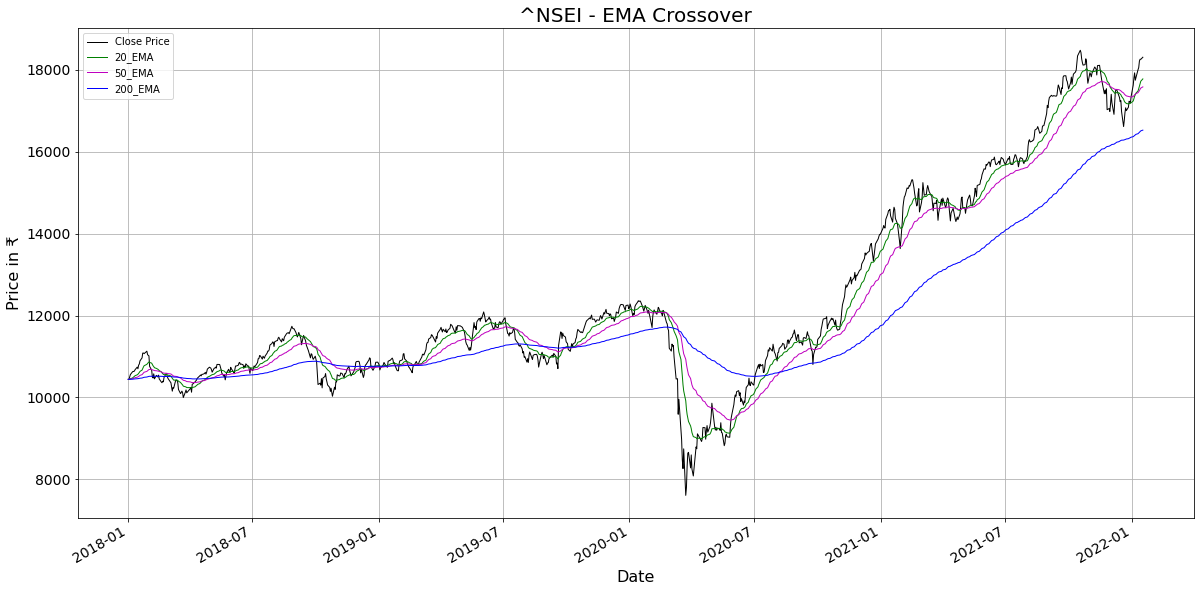

^NSEI
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2018-01-03 00:00:00 |       10443.2 |  10442.3 |  10442.2 |   10442.2 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [8]:
plot_buy_sell('^NSEI', '2018-01-01', True)

[*********************100%***********************]  1 of 1 completed


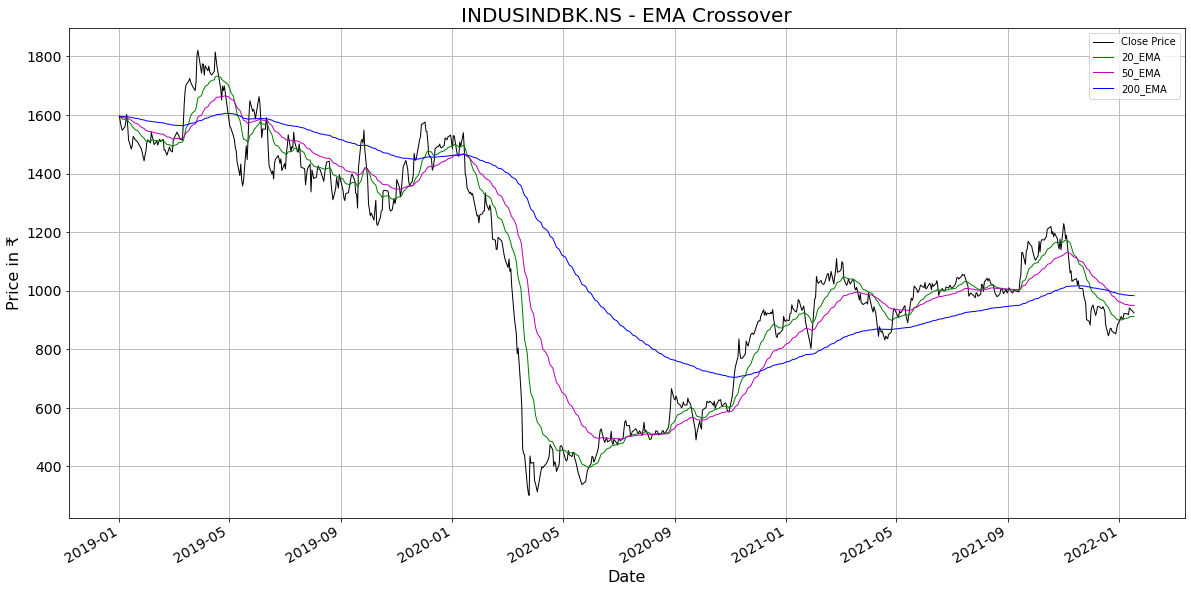

INDUSINDBK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        1576.6 |  1593.79 |  1594.85 |   1595.41 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


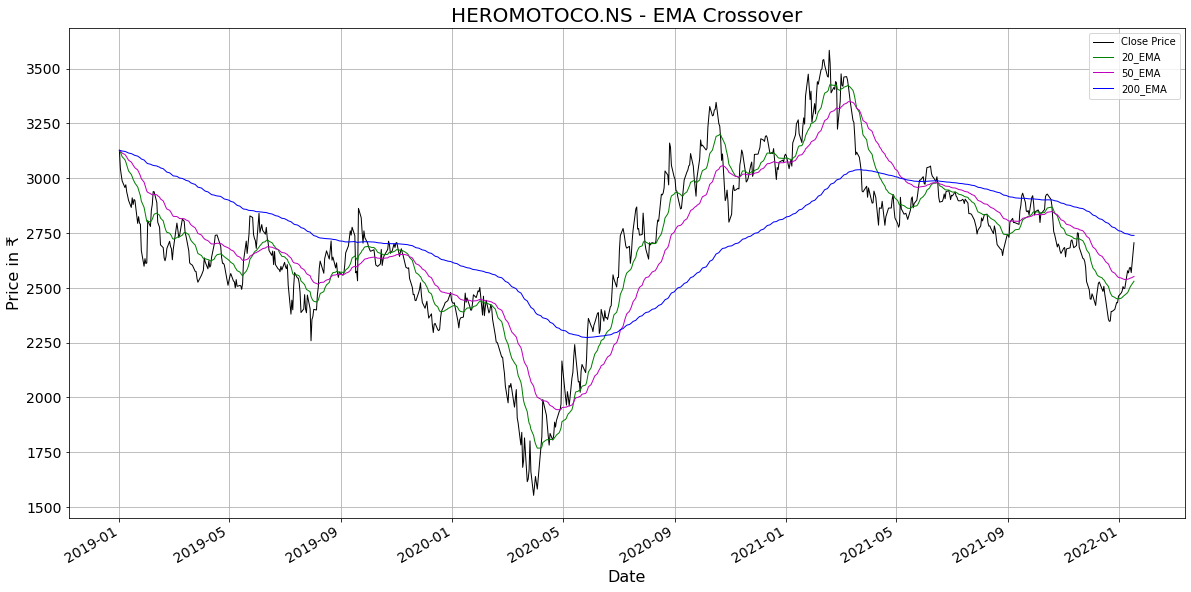

HEROMOTOCO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       3046.55 |  3119.88 |  3124.42 |   3126.79 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


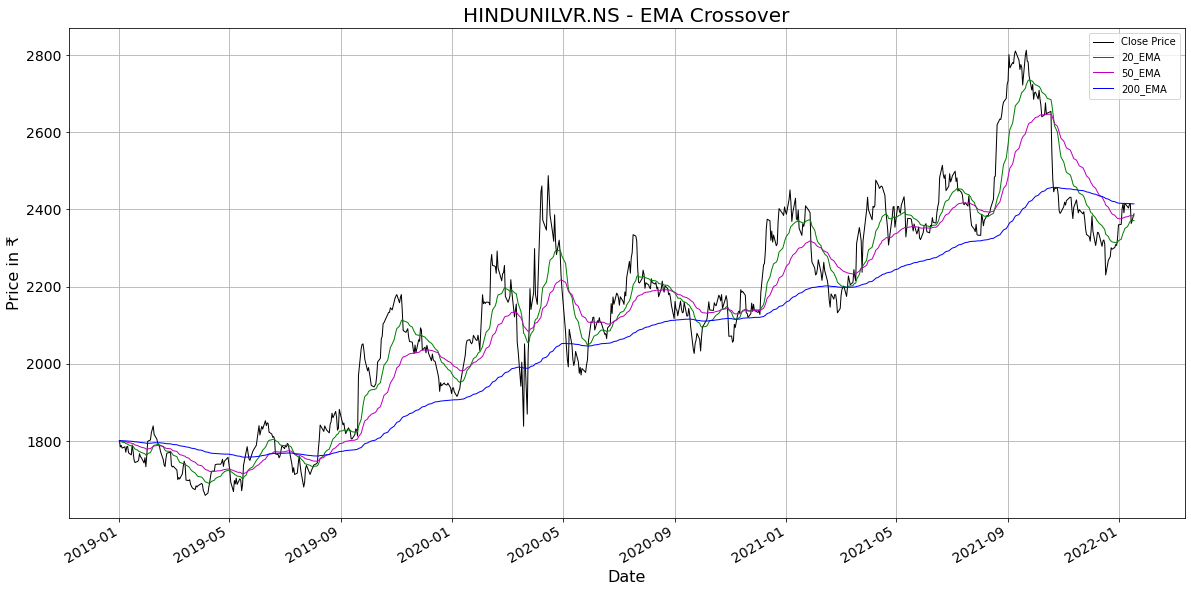

HINDUNILVR.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        1784.6 |  1799.53 |  1800.45 |   1800.94 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


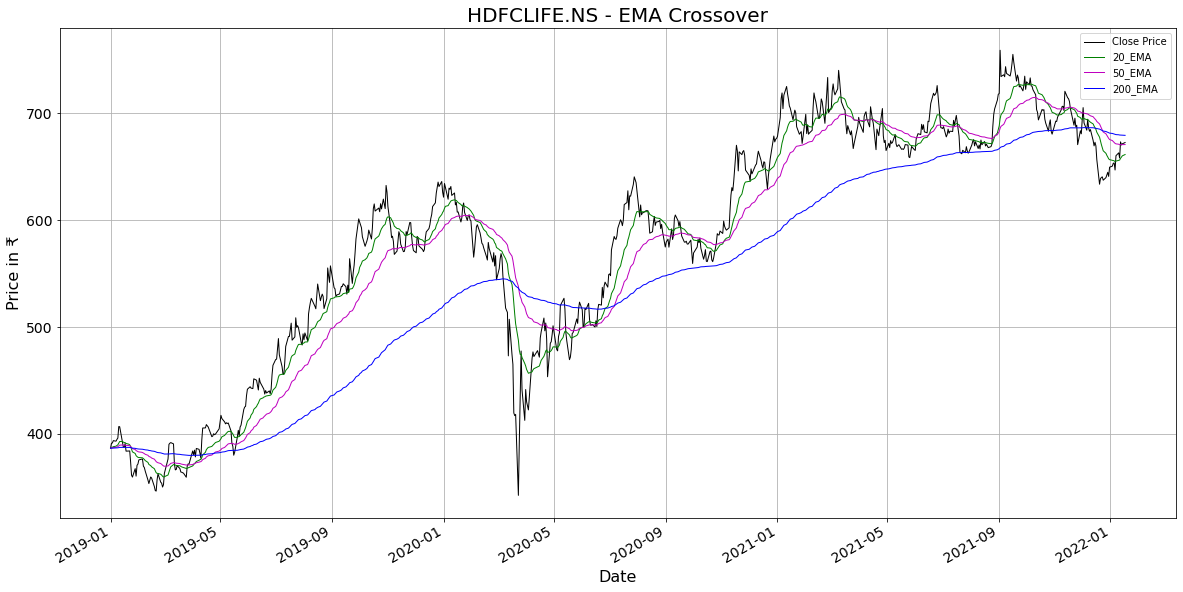

HDFCLIFE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        391.15 |  386.852 |  386.586 |   386.447 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


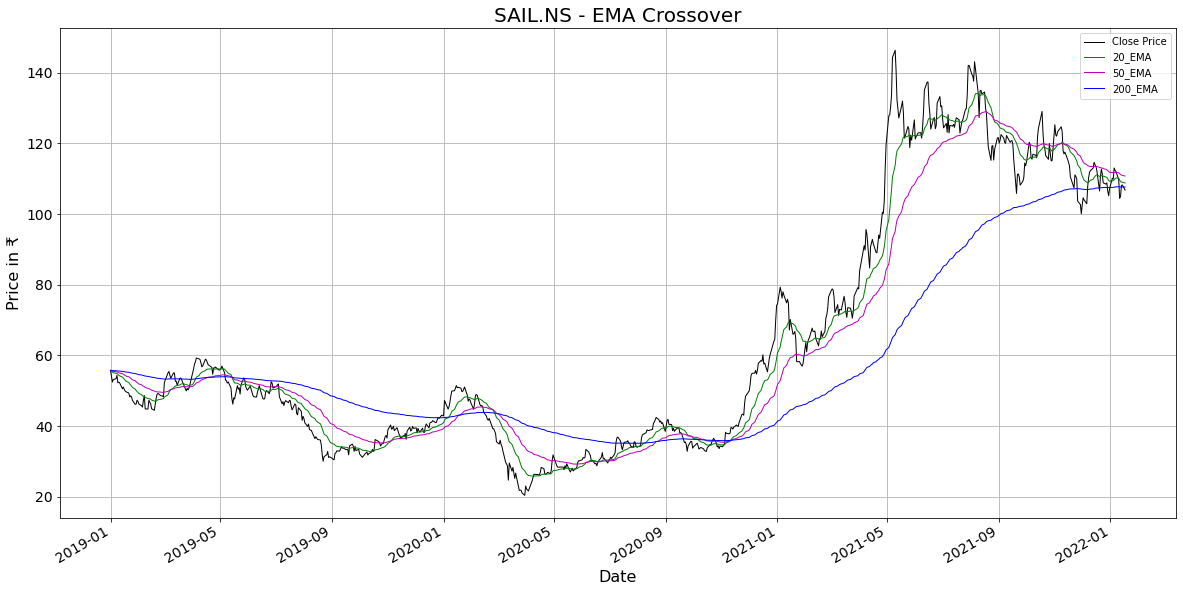

SAIL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |            54 |  55.5833 |  55.6814 |   55.7326 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


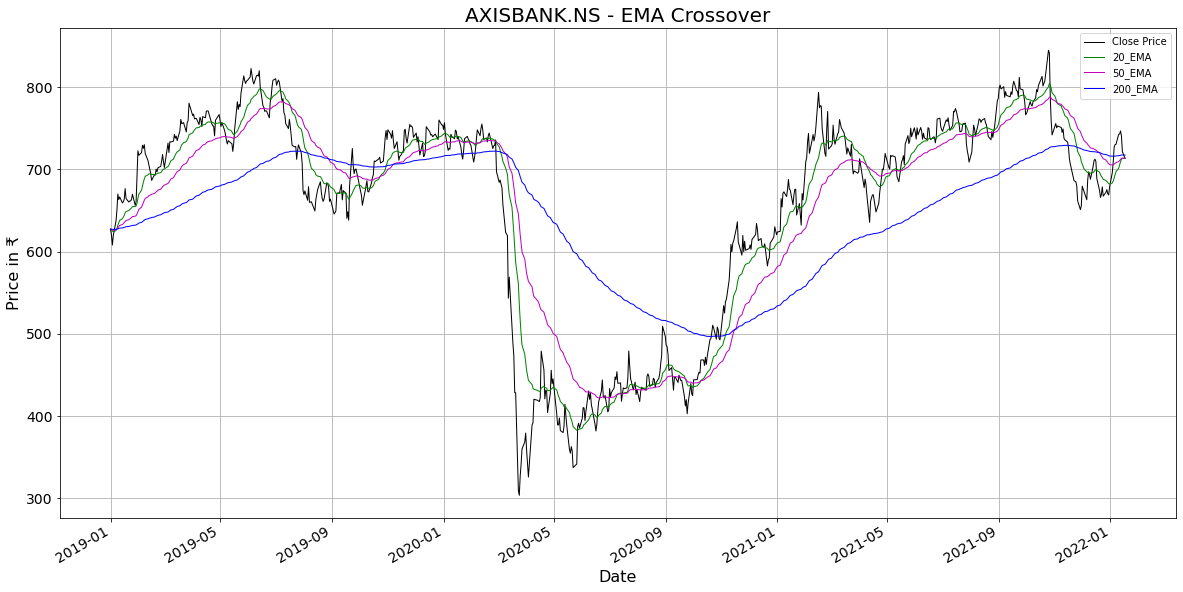

AXISBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        620.05 |   626.61 |  627.016 |   627.228 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


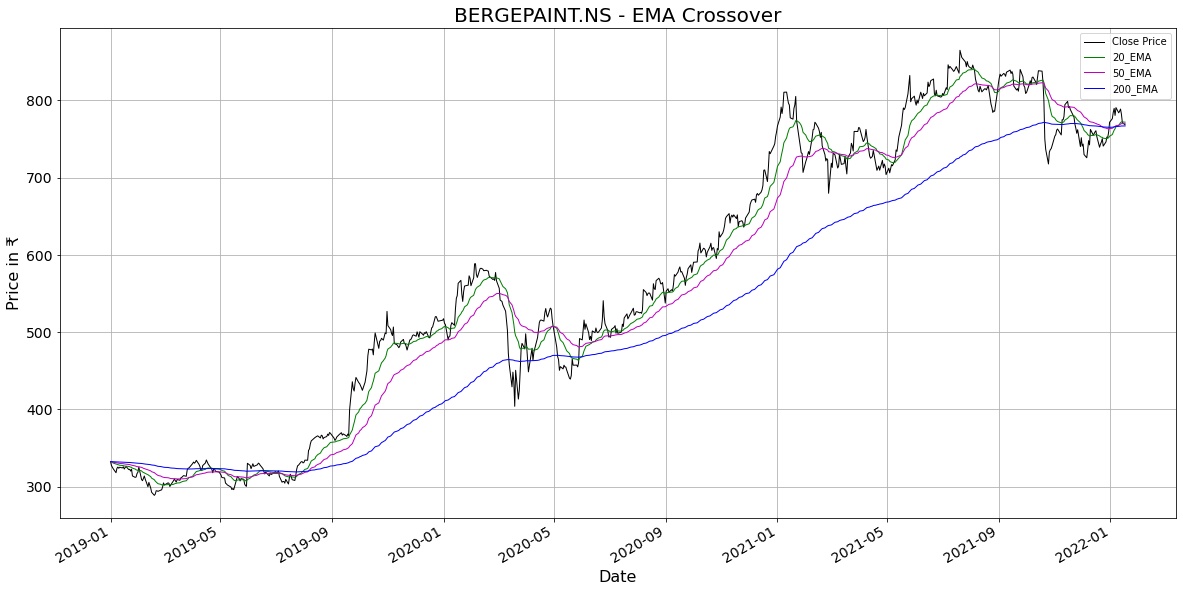

BERGEPAINT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         327.3 |  332.005 |  332.296 |   332.448 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


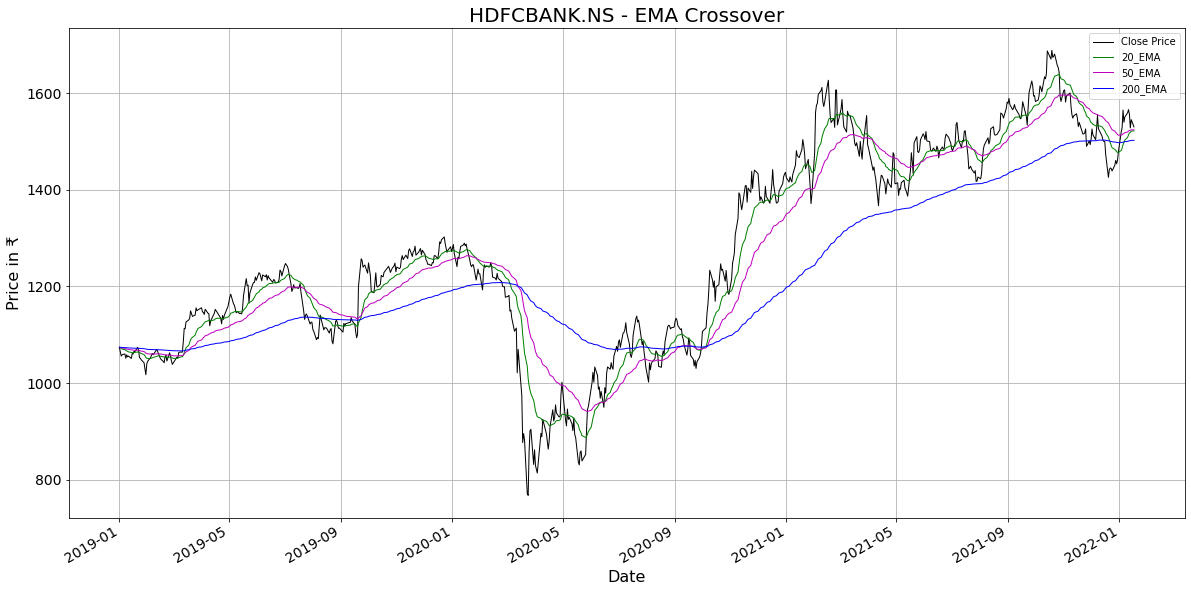

HDFCBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       1064.25 |  1073.12 |  1073.67 |   1073.95 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


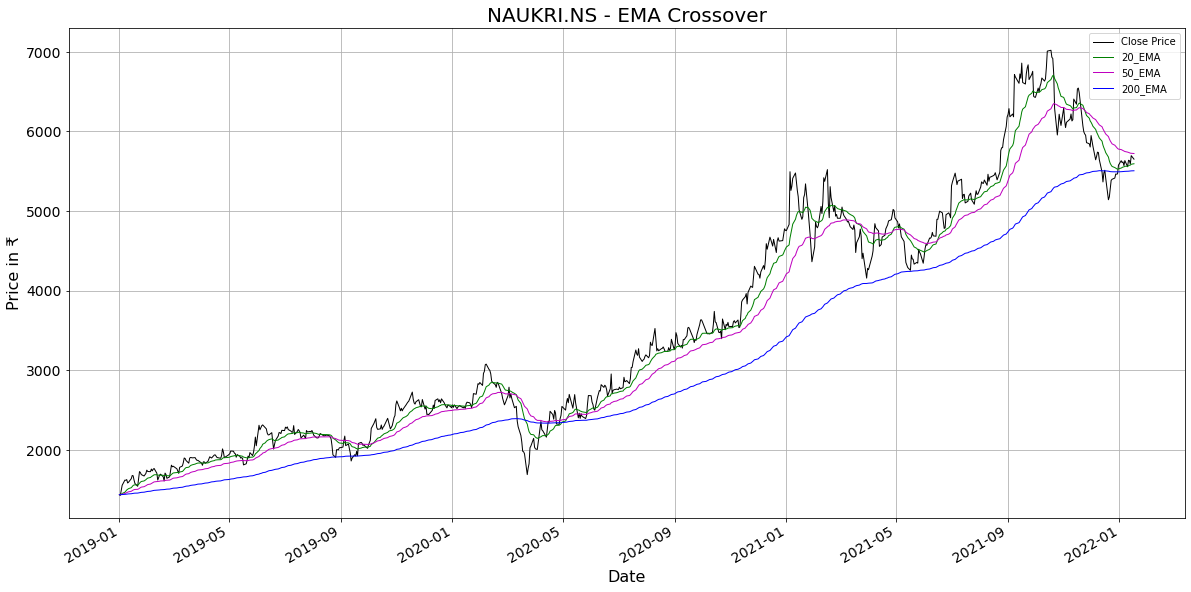

NAUKRI.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       1430.45 |  1438.19 |  1438.66 |   1438.91 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


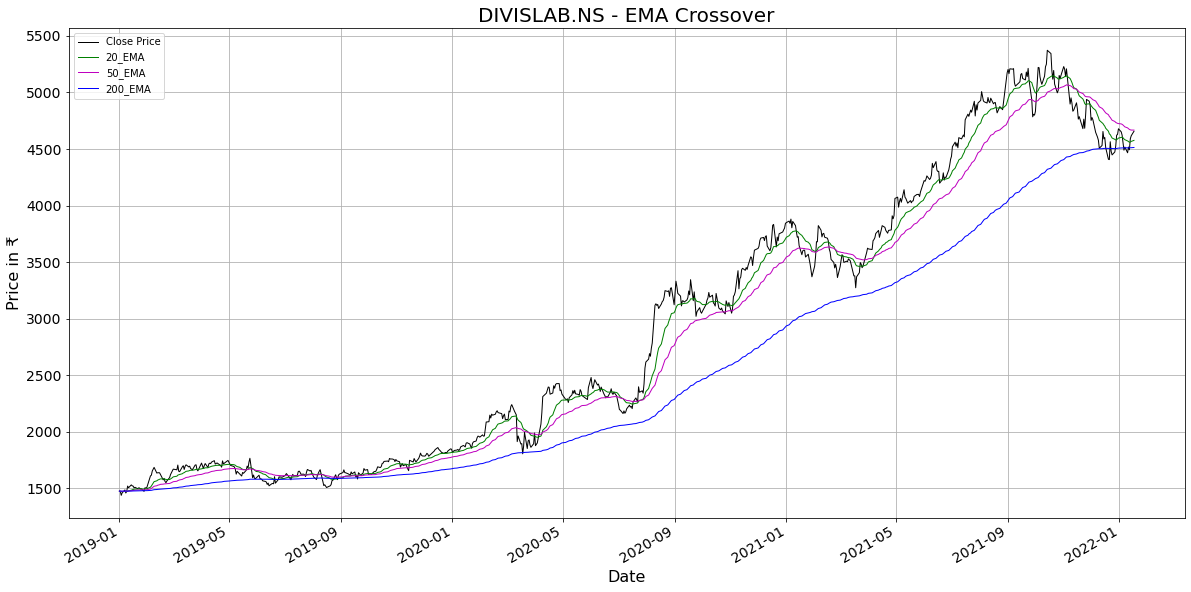

DIVISLAB.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        1470.9 |  1475.02 |  1475.27 |    1475.4 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


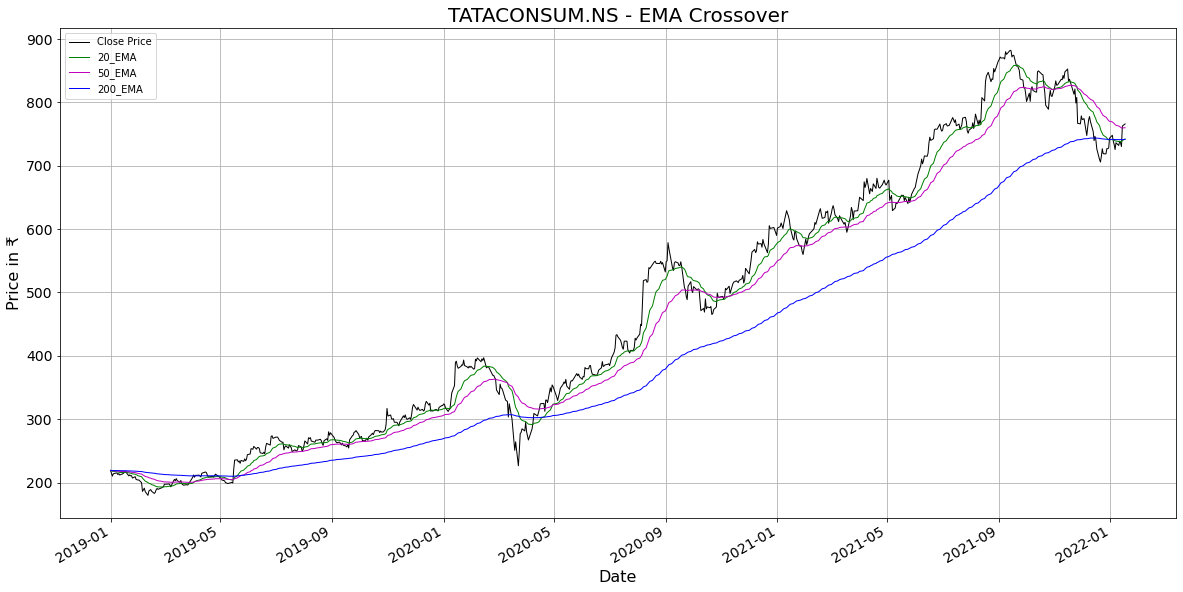

TATACONSUM.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         214.6 |  218.671 |  218.924 |   219.055 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


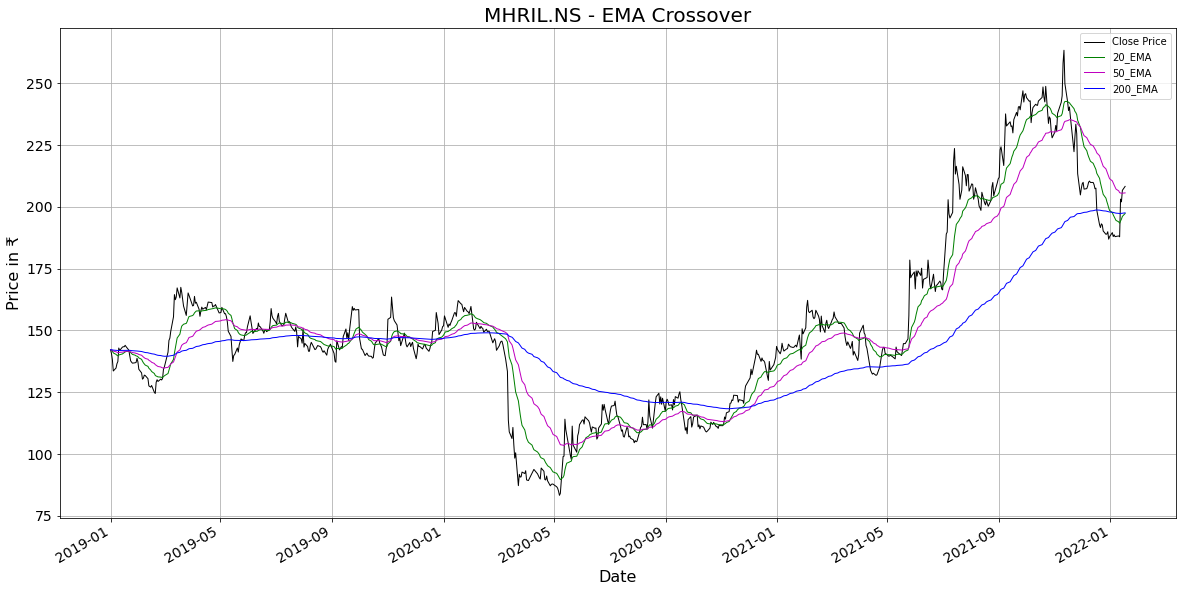

MHRIL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         140.6 |  141.987 |  142.073 |   142.118 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


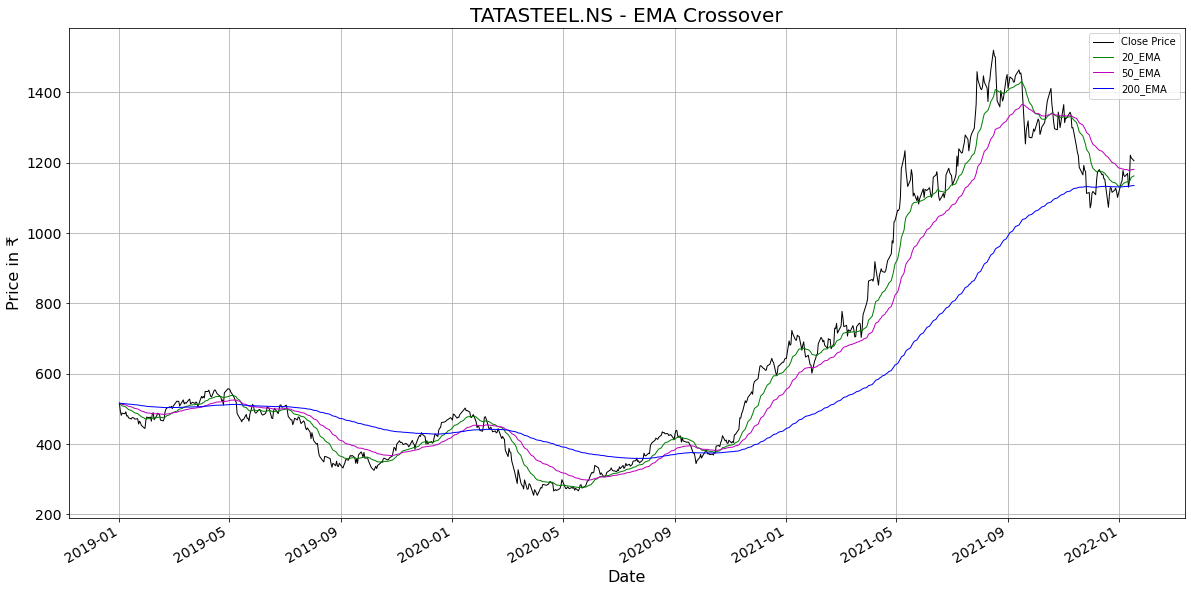

TATASTEEL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        493.65 |  513.645 |  514.883 |    515.53 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


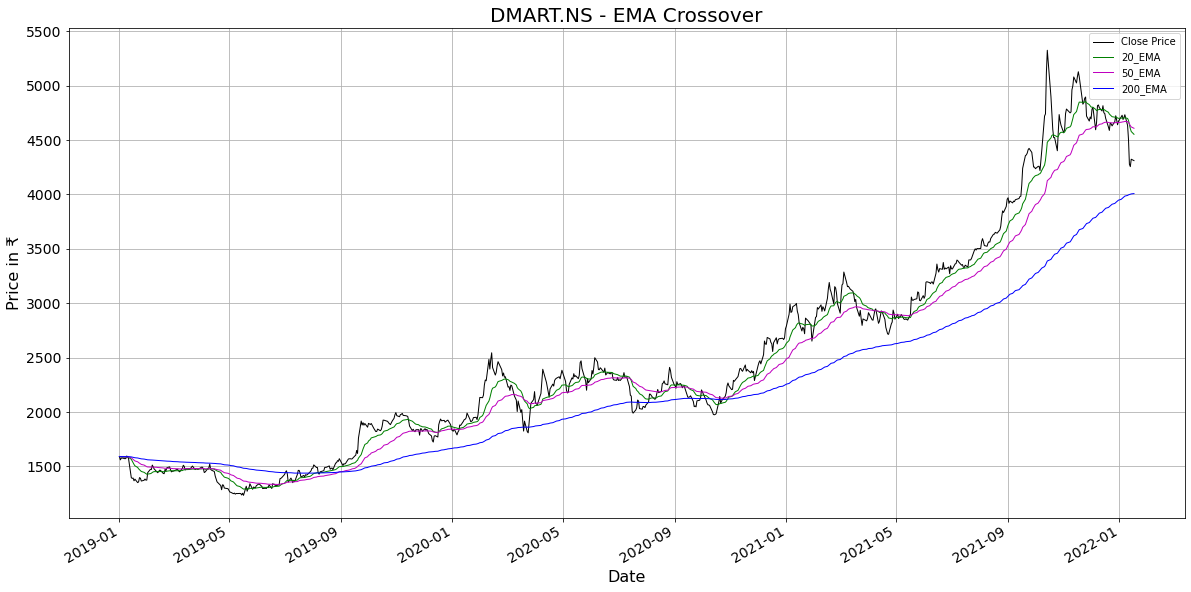

DMART.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       1560.25 |  1587.85 |  1589.55 |   1590.45 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


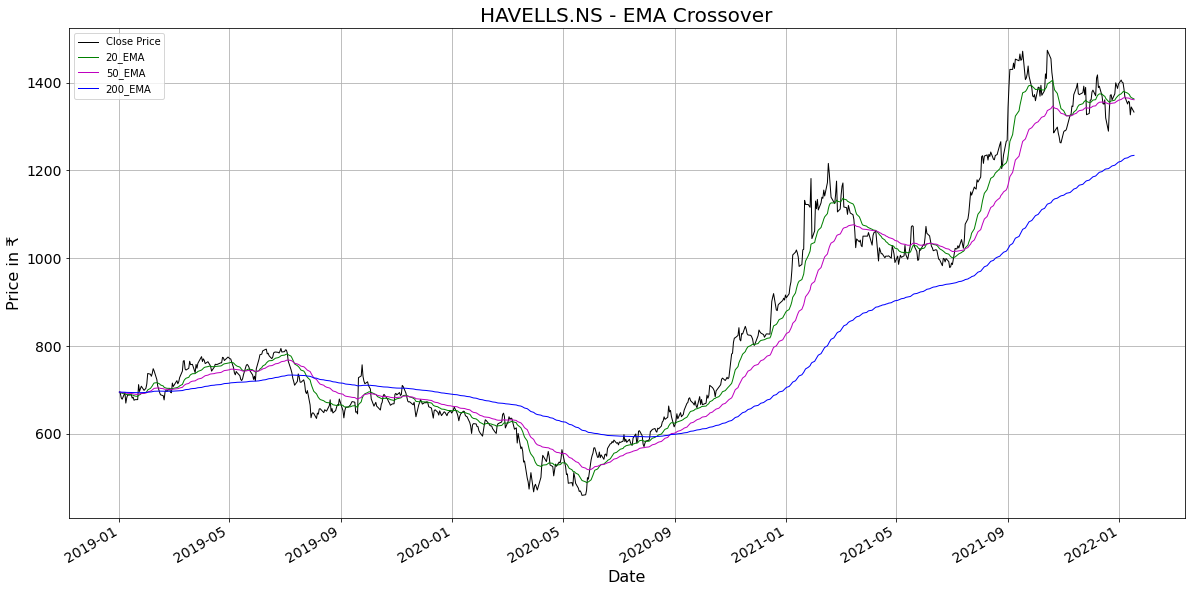

HAVELLS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         691.8 |  694.514 |  694.682 |    694.77 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


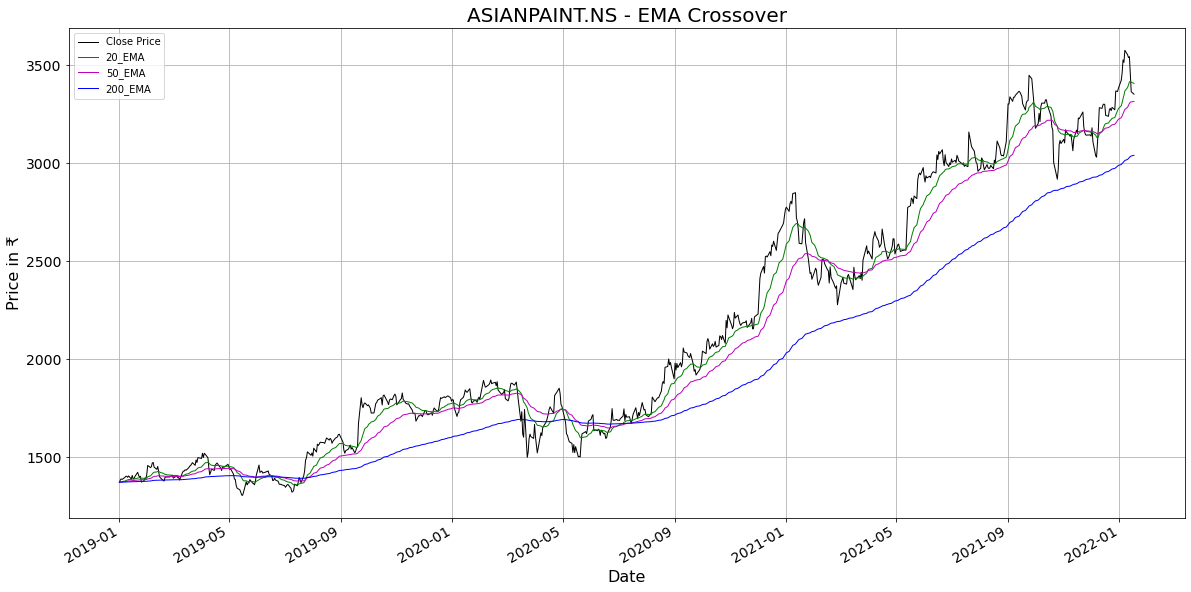

ASIANPAINT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        1383.3 |  1372.67 |  1372.01 |   1371.67 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


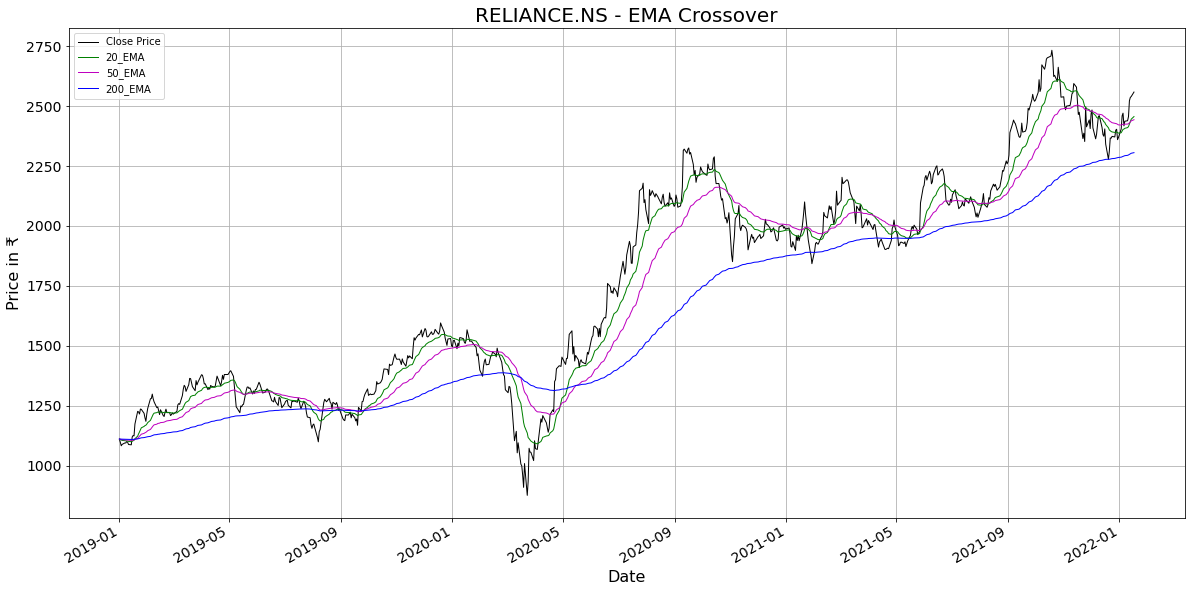

RELIANCE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       1096.01 |   1109.1 |  1109.91 |   1110.33 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


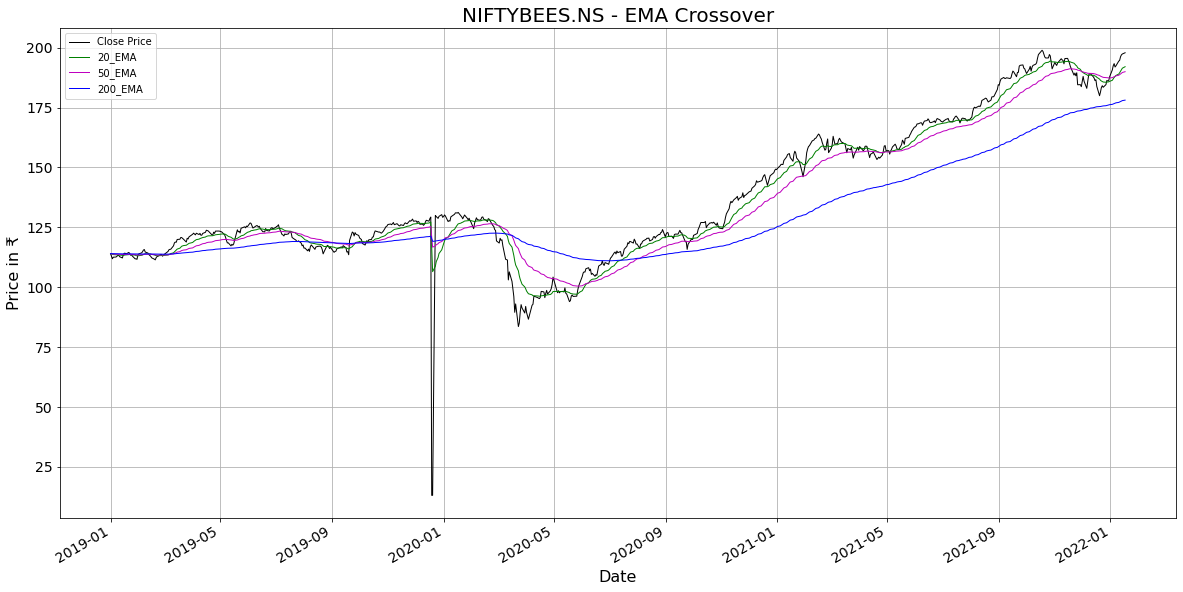

NIFTYBEES.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       112.973 |  113.888 |  113.944 |   113.974 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


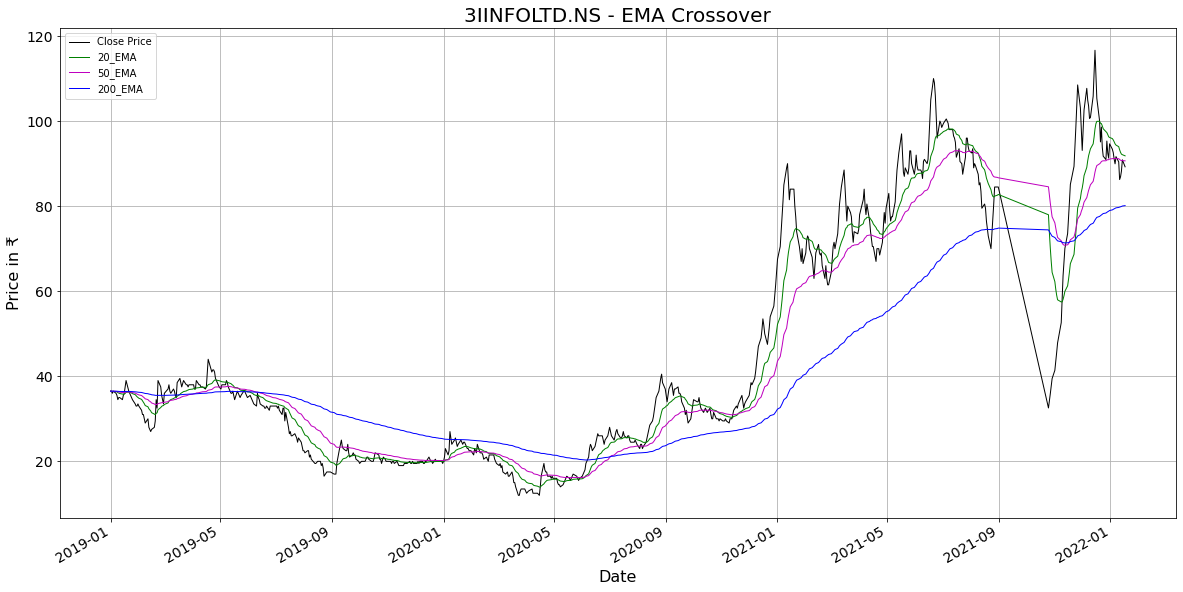

3IINFOLTD.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-03 00:00:00 |            36 |  36.4524 |  36.4804 |    36.495 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


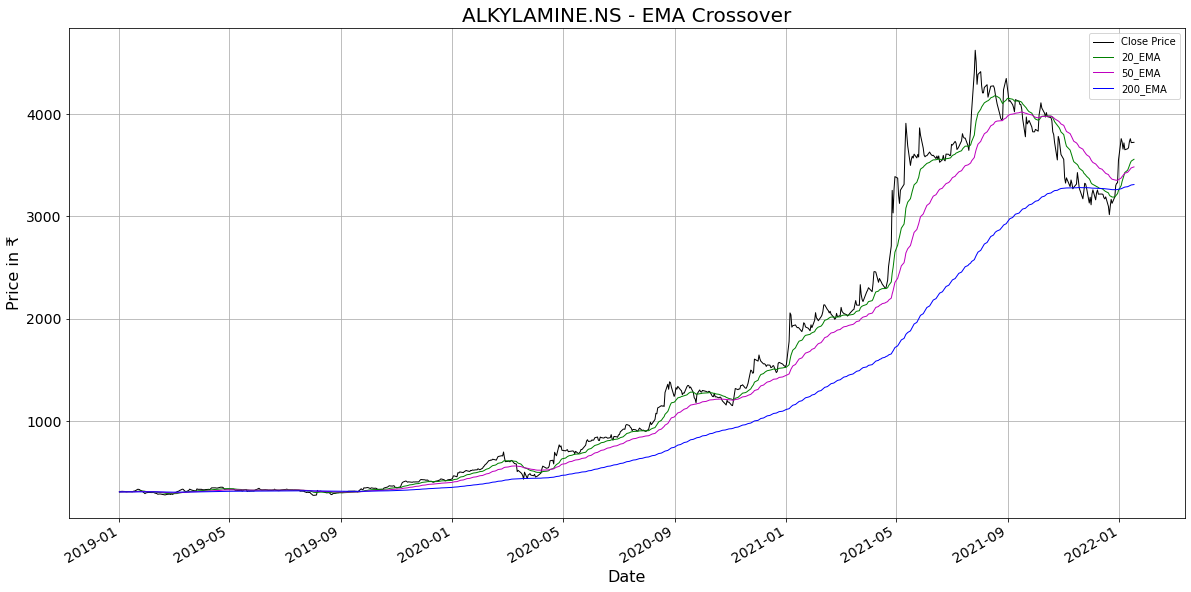

ALKYLAMINE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        313.54 |  309.613 |   309.37 |   309.243 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


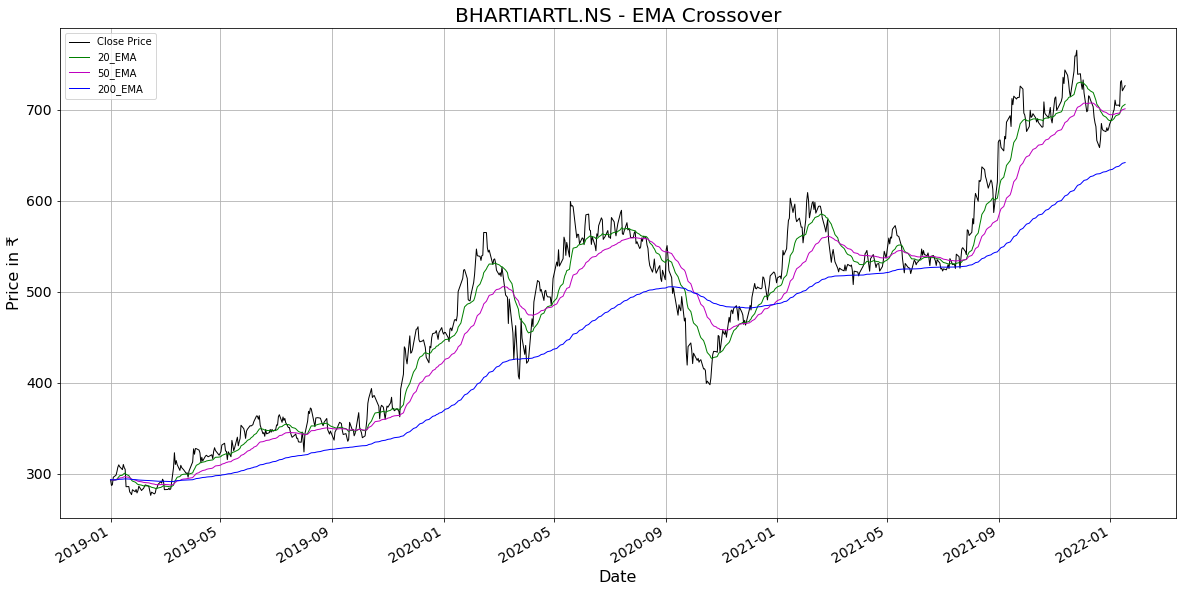

BHARTIARTL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       287.068 |  292.759 |  293.111 |   293.295 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


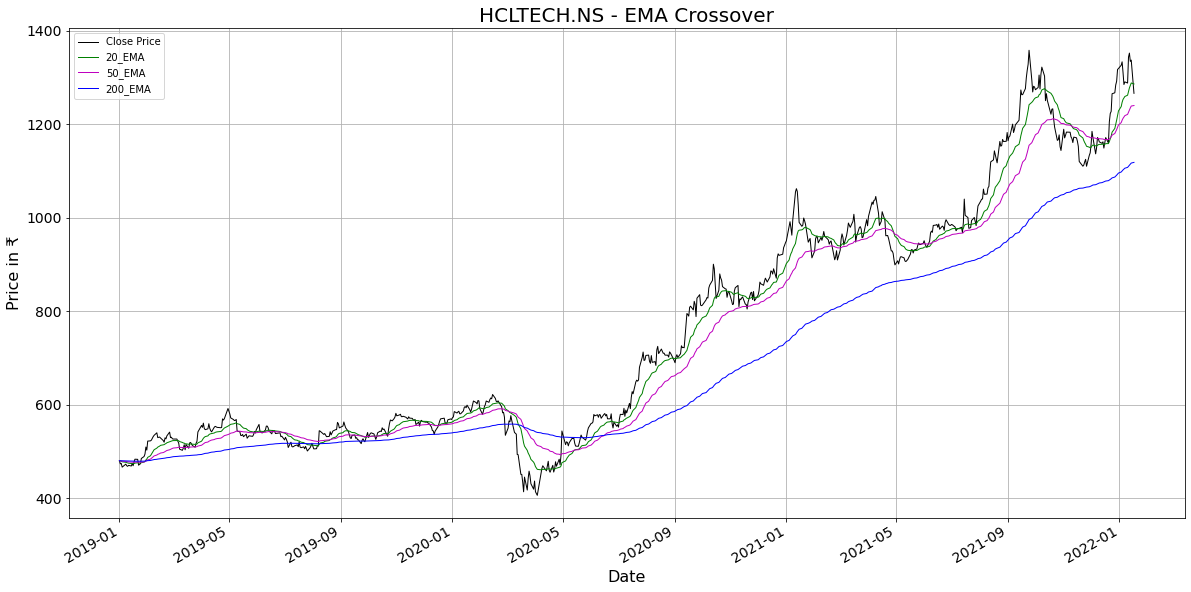

HCLTECH.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       473.175 |  479.282 |   479.66 |   479.858 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


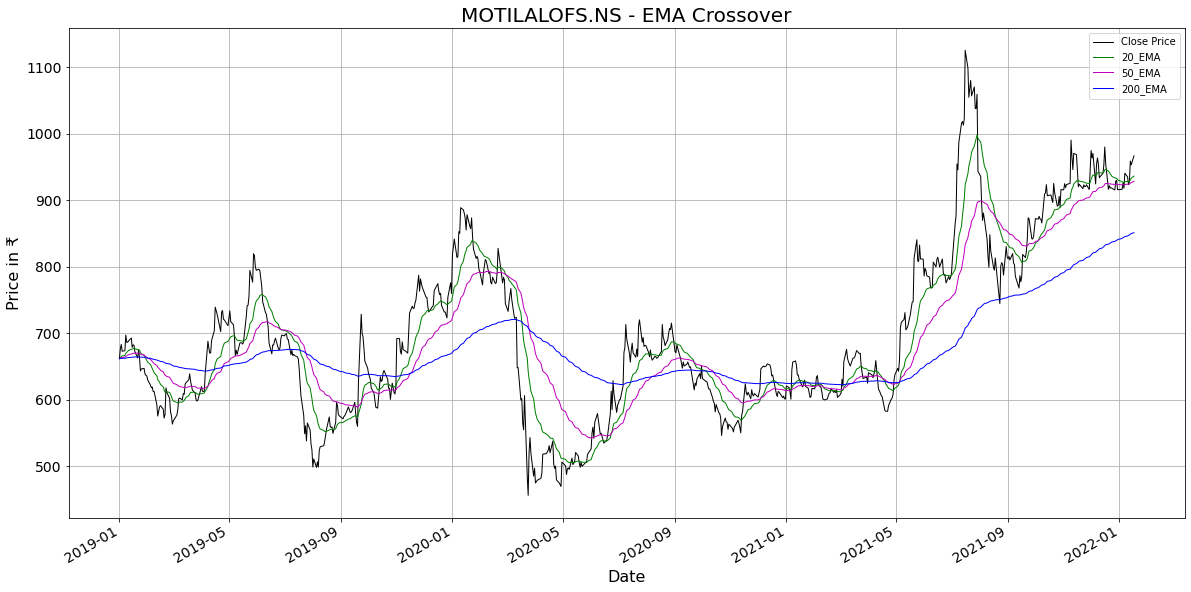

MOTILALOFS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        676.55 |   663.16 |   662.33 |   661.897 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


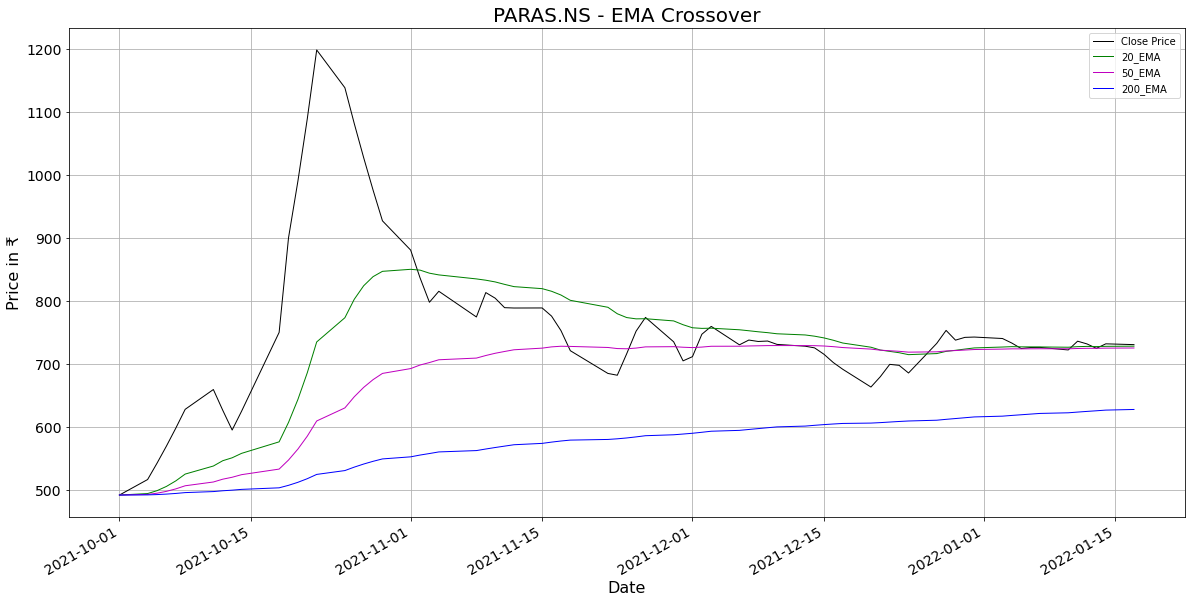

PARAS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-10-04 00:00:00 |        517.05 |  494.793 |  493.415 |   492.695 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


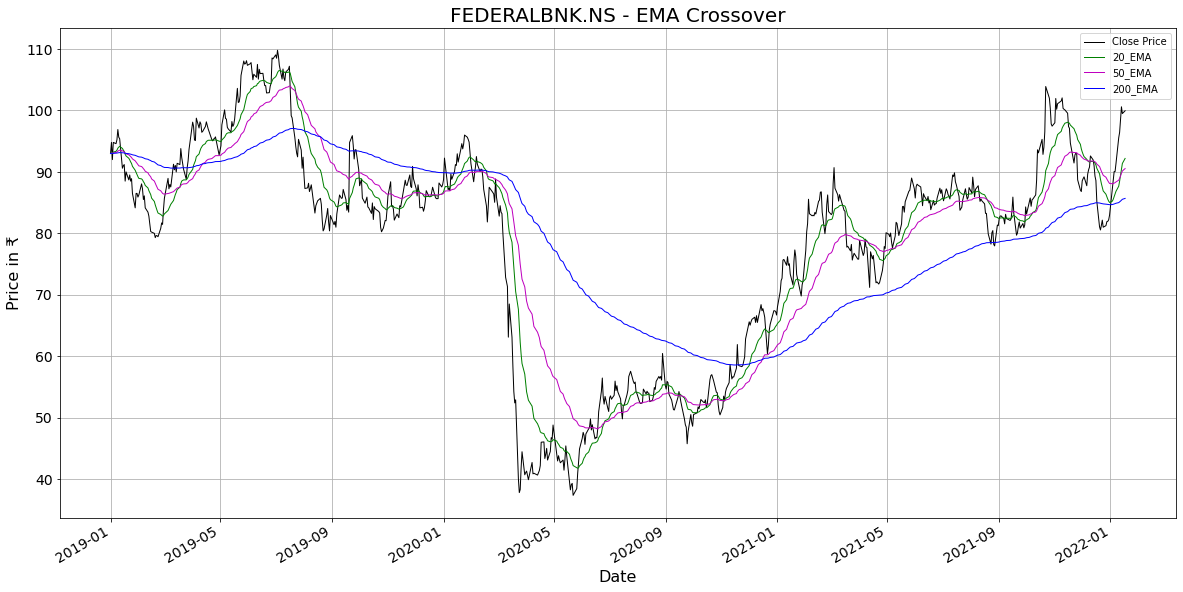

FEDERALBNK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |          94.8 |  93.1714 |  93.0706 |   93.0179 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


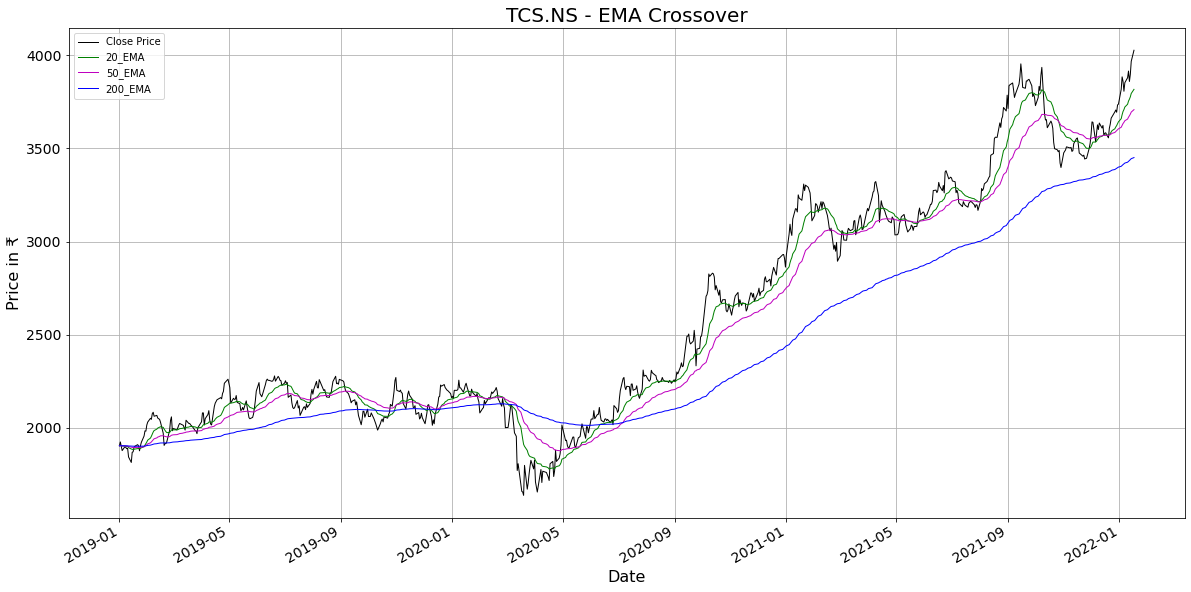

TCS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        1923.3 |  1904.75 |   1903.6 |      1903 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


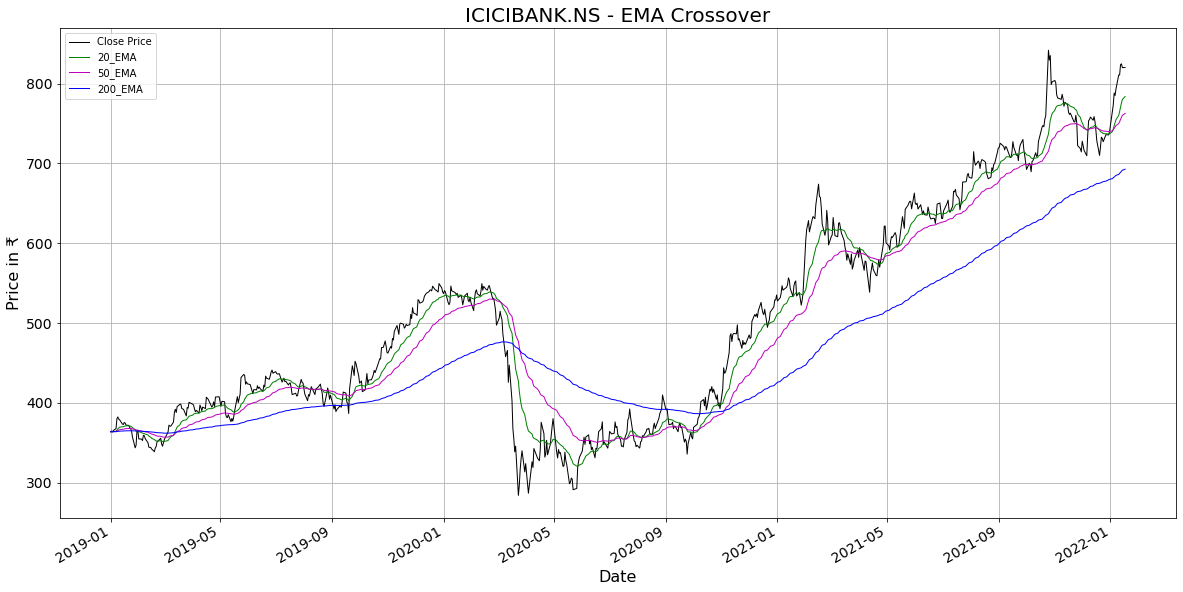

ICICIBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         364.6 |  363.831 |  363.783 |   363.758 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


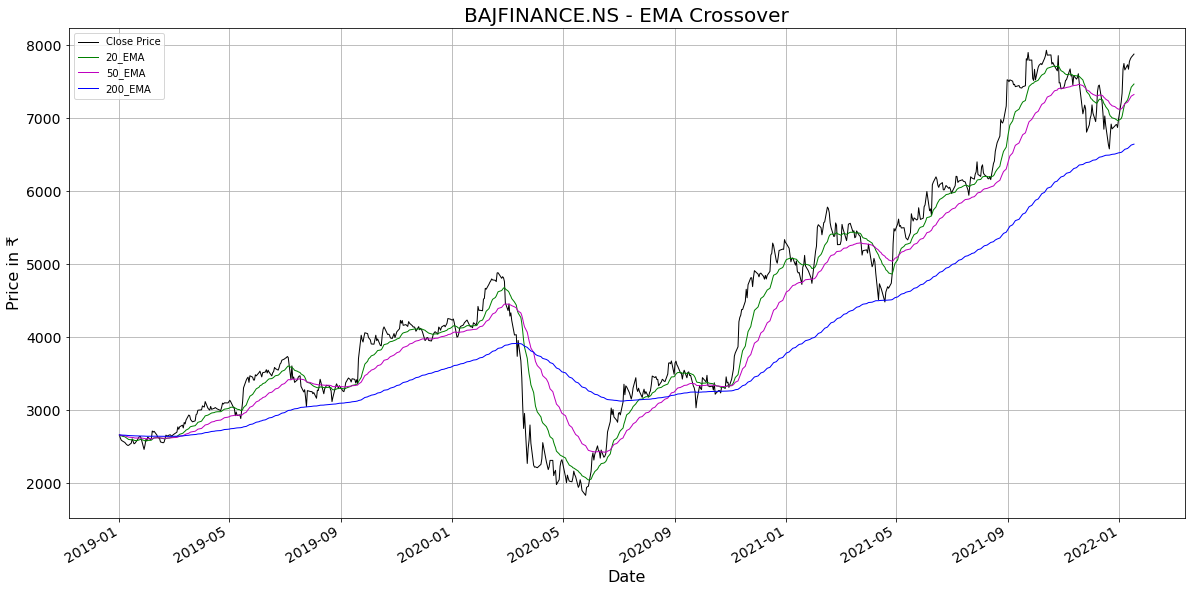

BAJFINANCE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       2614.05 |  2652.77 |  2655.17 |   2656.42 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


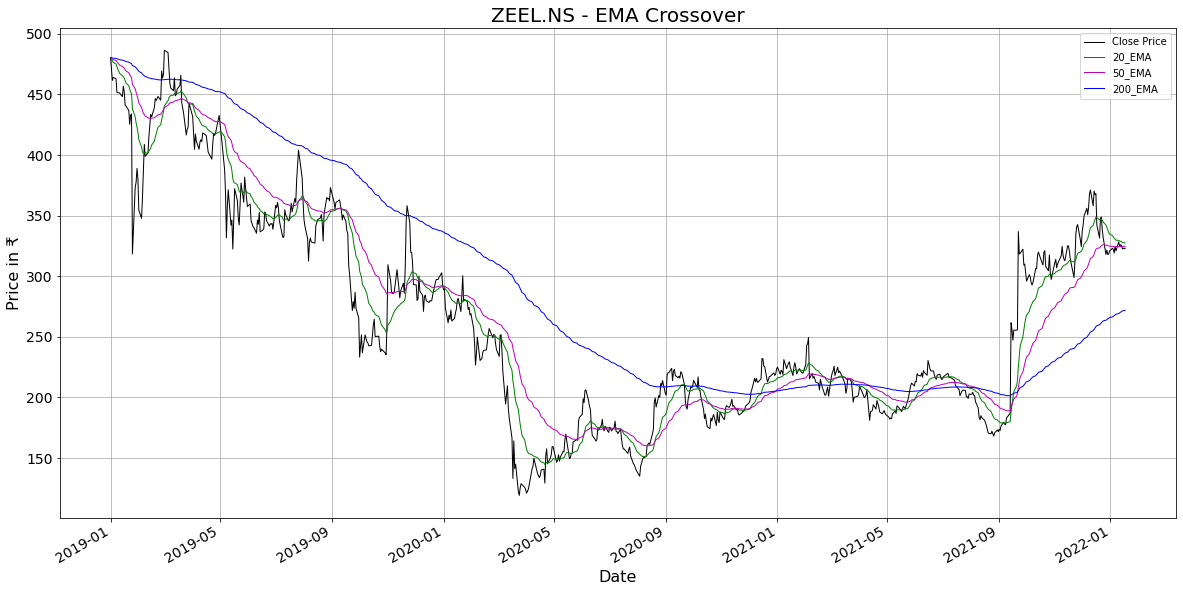

ZEEL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        470.25 |  479.298 |  479.858 |    480.15 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


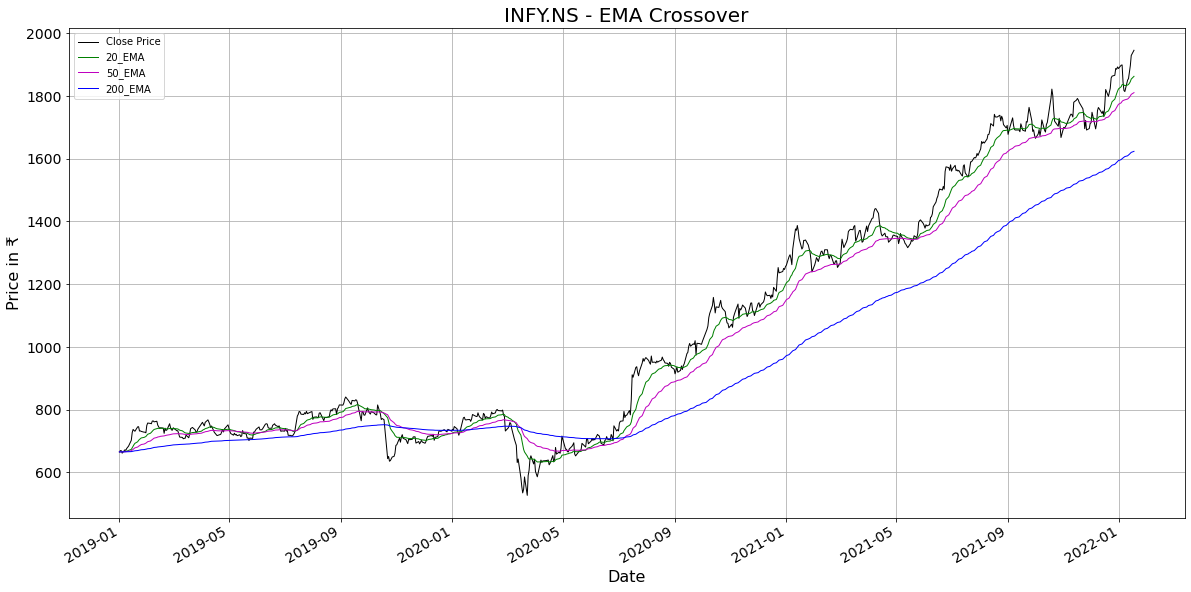

INFY.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        669.05 |  665.431 |  665.207 |    665.09 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


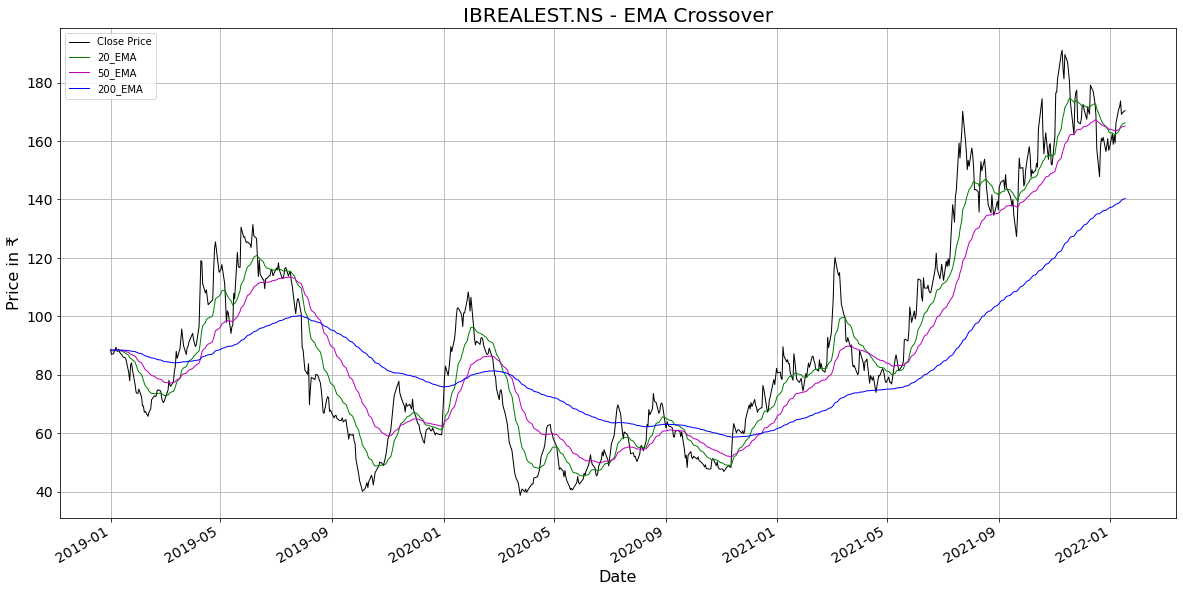

IBREALEST.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         86.95 |  88.3524 |  88.4392 |   88.4846 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


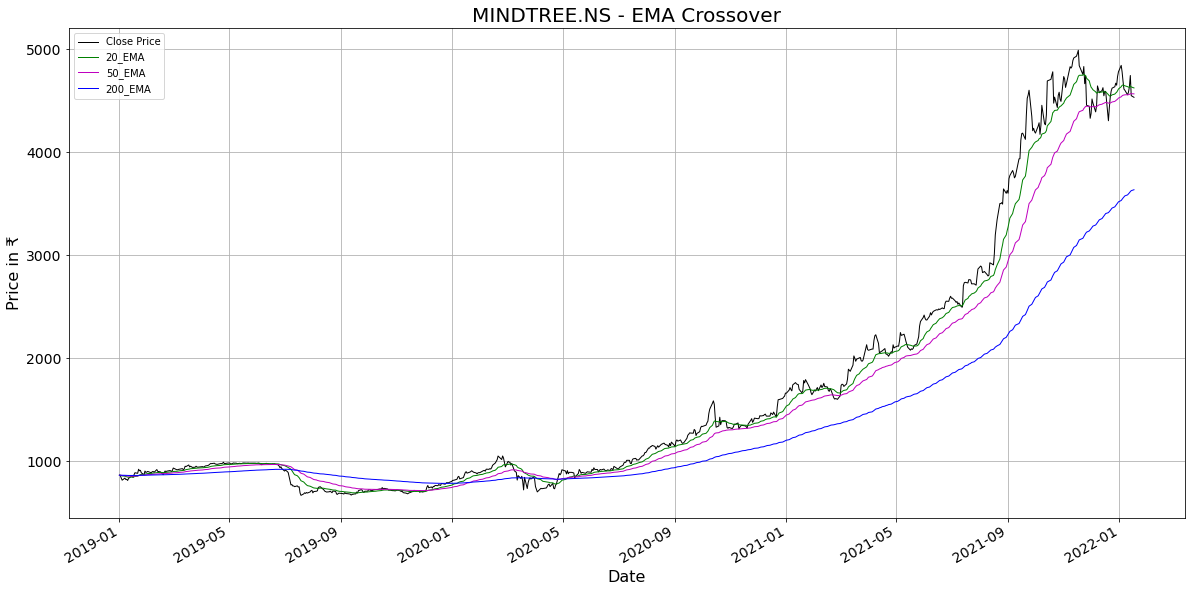

MINDTREE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         860.5 |  863.124 |  863.286 |   863.371 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


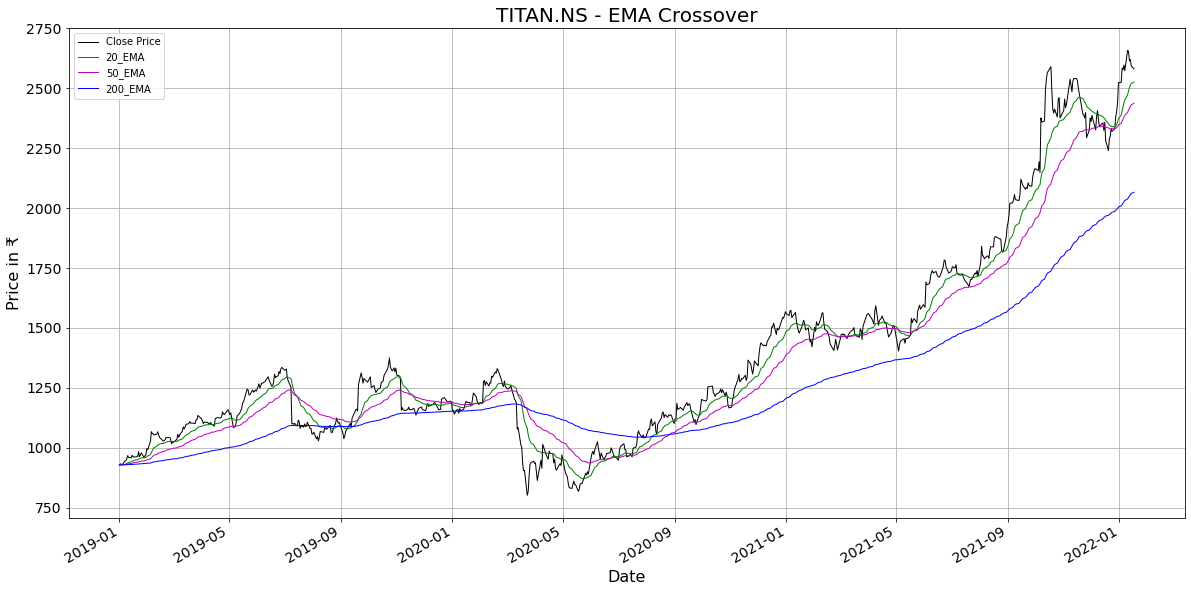

TITAN.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        932.15 |  928.395 |  928.163 |   928.041 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


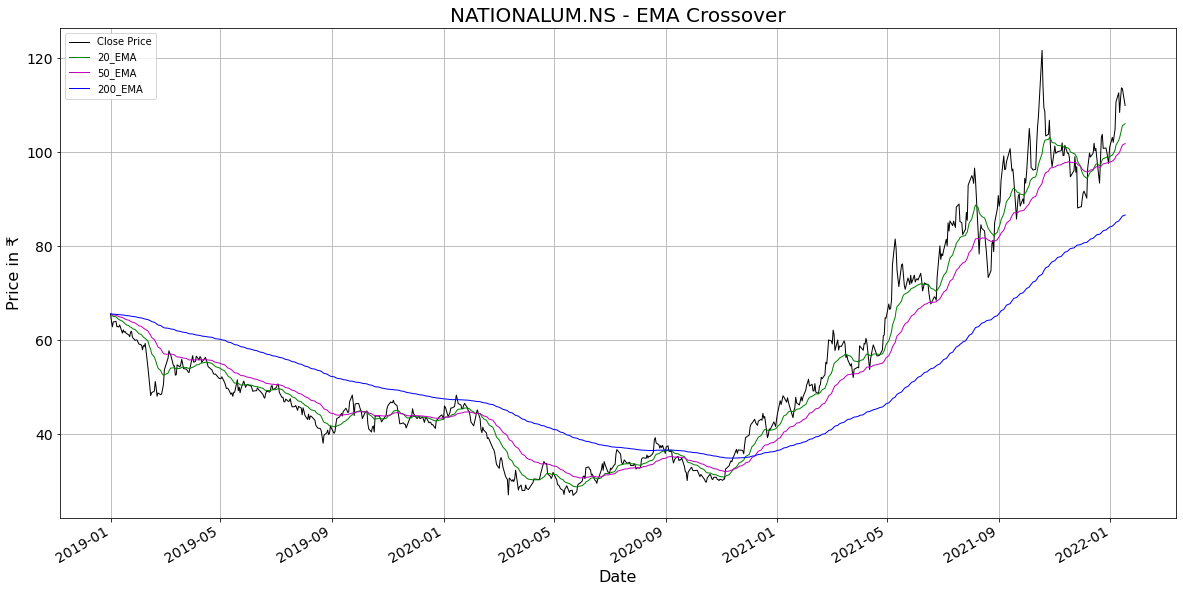

NATIONALUM.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         63.95 |  65.3976 |  65.4873 |   65.5341 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


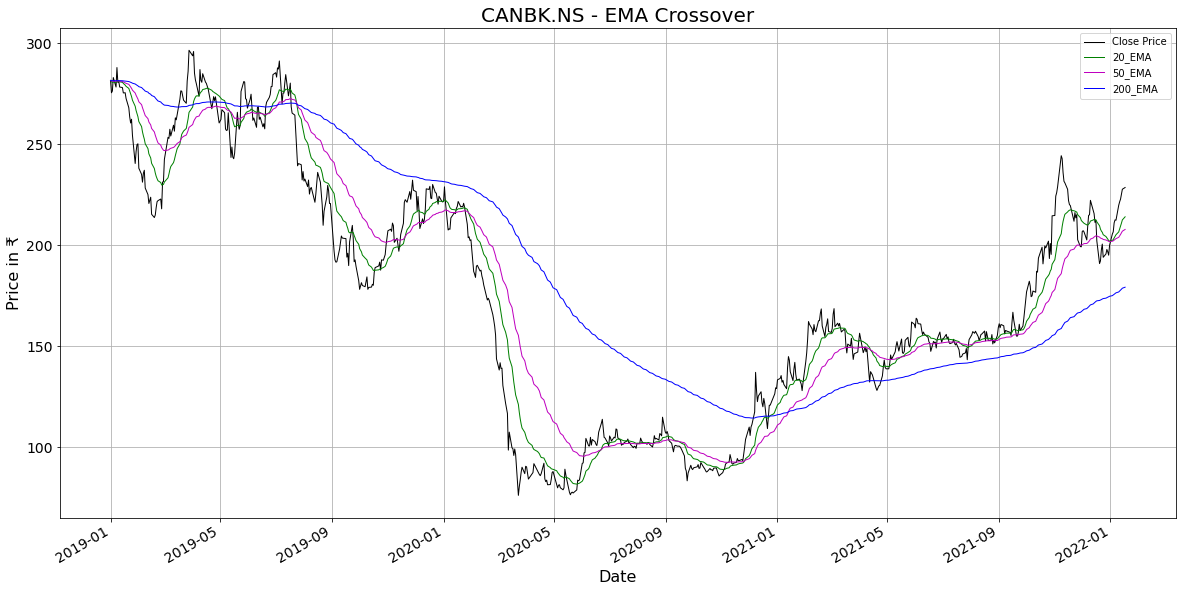

CANBK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         275.4 |  280.919 |  281.261 |   281.439 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


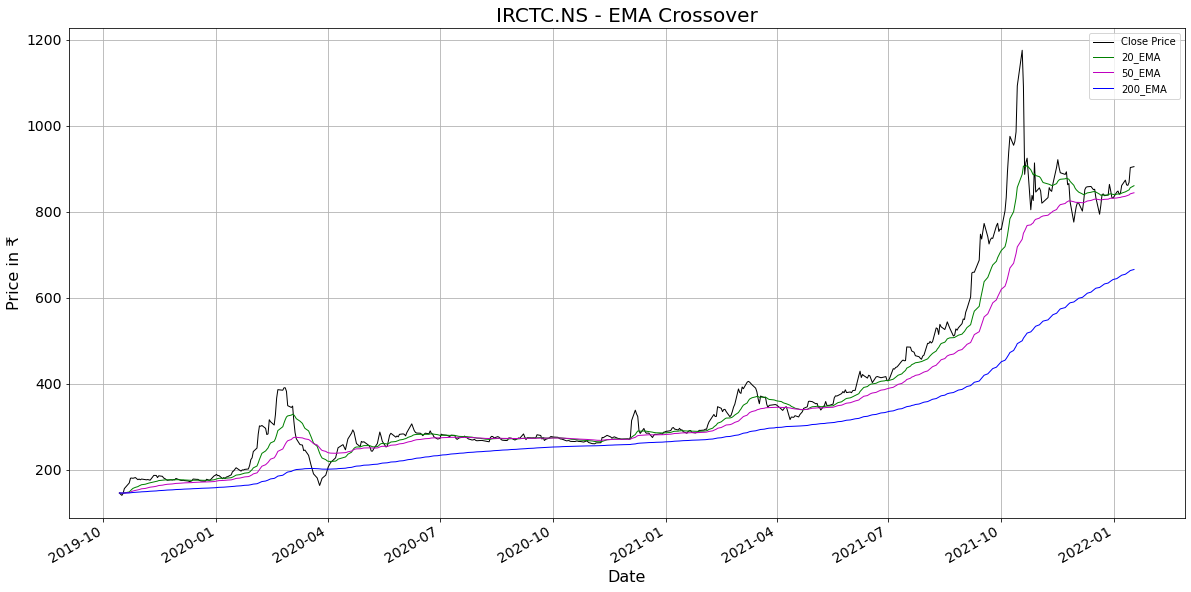

IRCTC.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-10-15 00:00:00 |        142.63 |  145.272 |  145.435 |   145.521 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


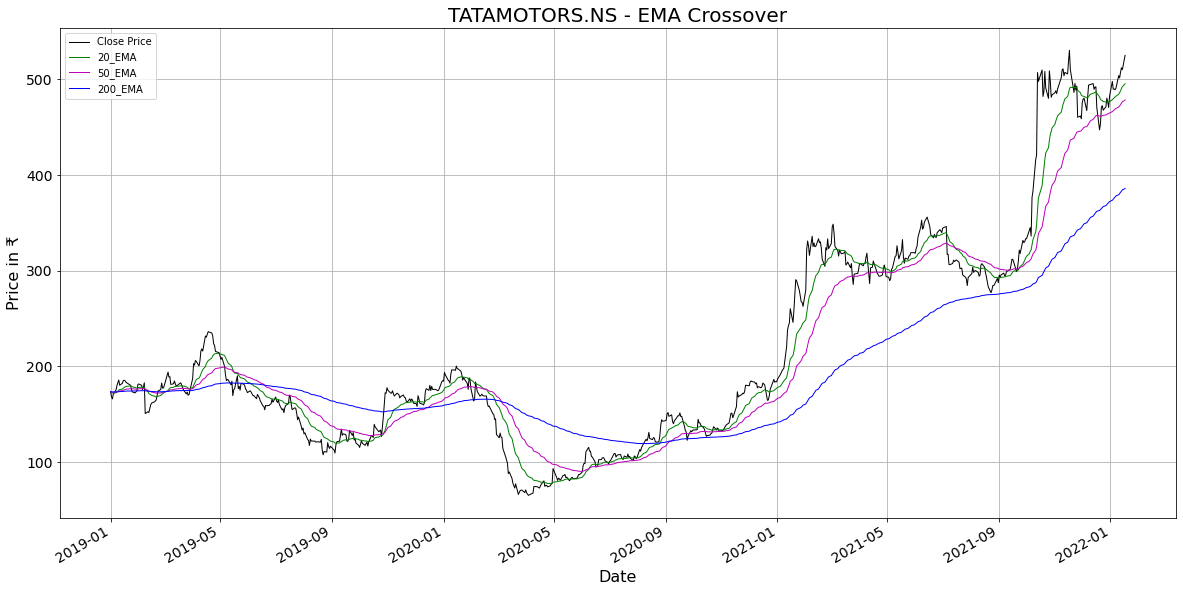

TATAMOTORS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |        168.55 |  172.983 |  173.258 |   173.401 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


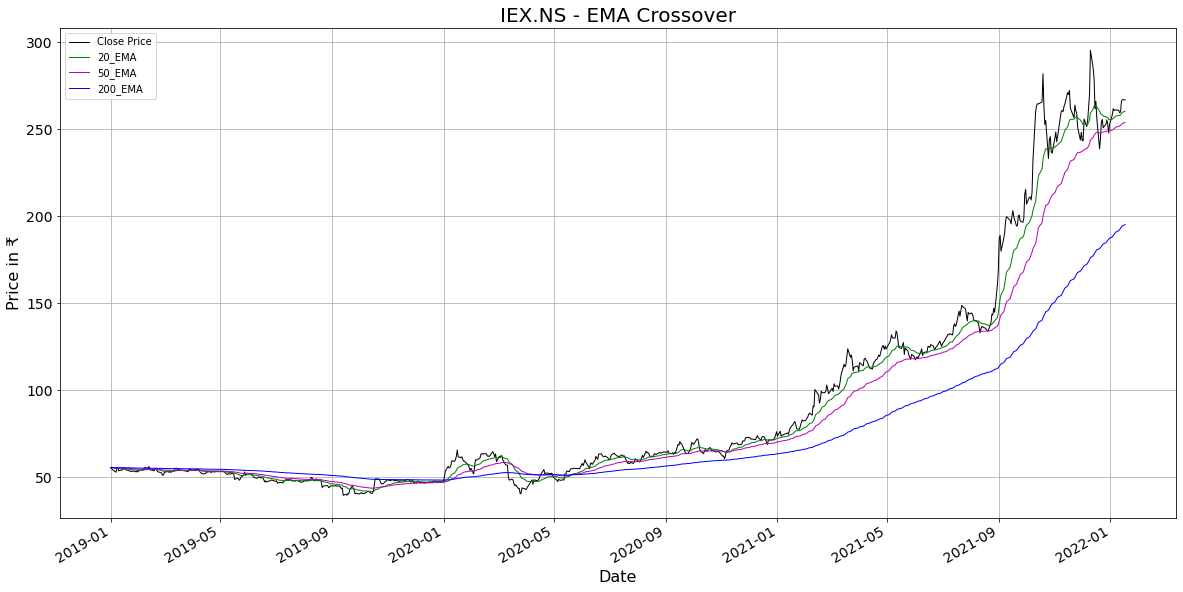

IEX.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |       54.8833 |  55.3357 |  55.3637 |   55.3784 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


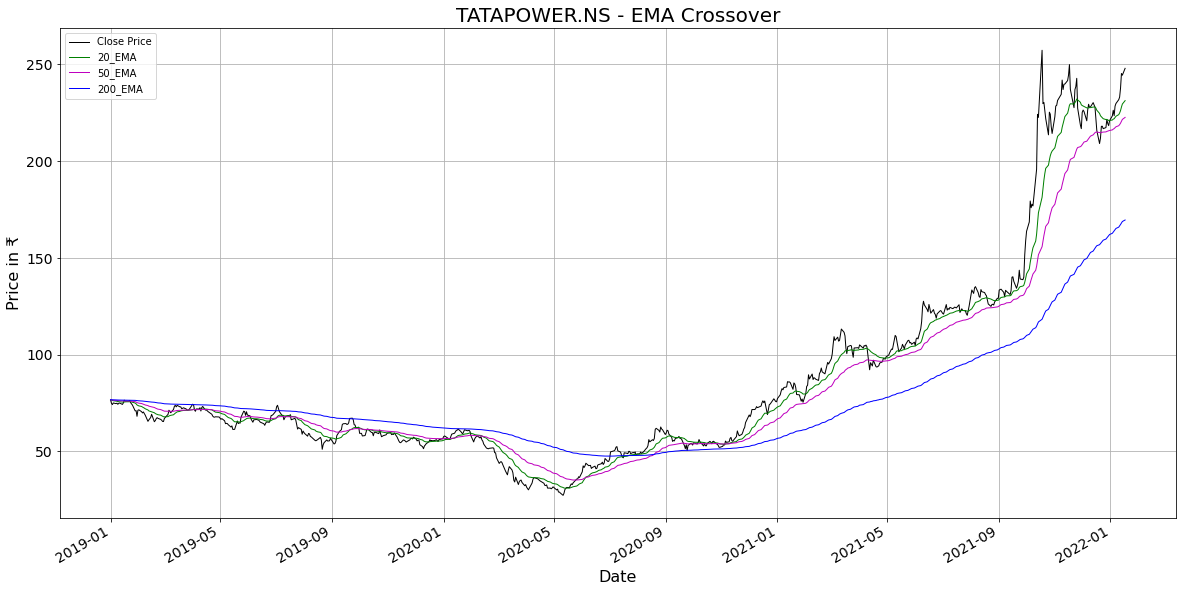

TATAPOWER.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         74.85 |  76.5238 |  76.6274 |   76.6816 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


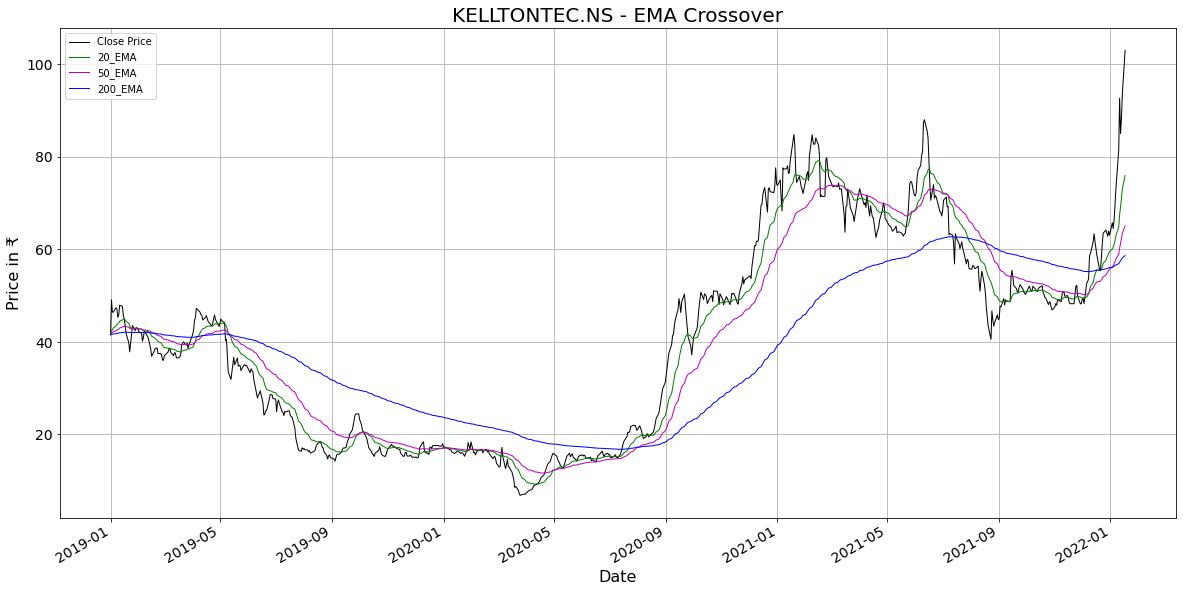

KELLTONTEC.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |          49.1 |   42.269 |  41.8461 |   41.6251 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


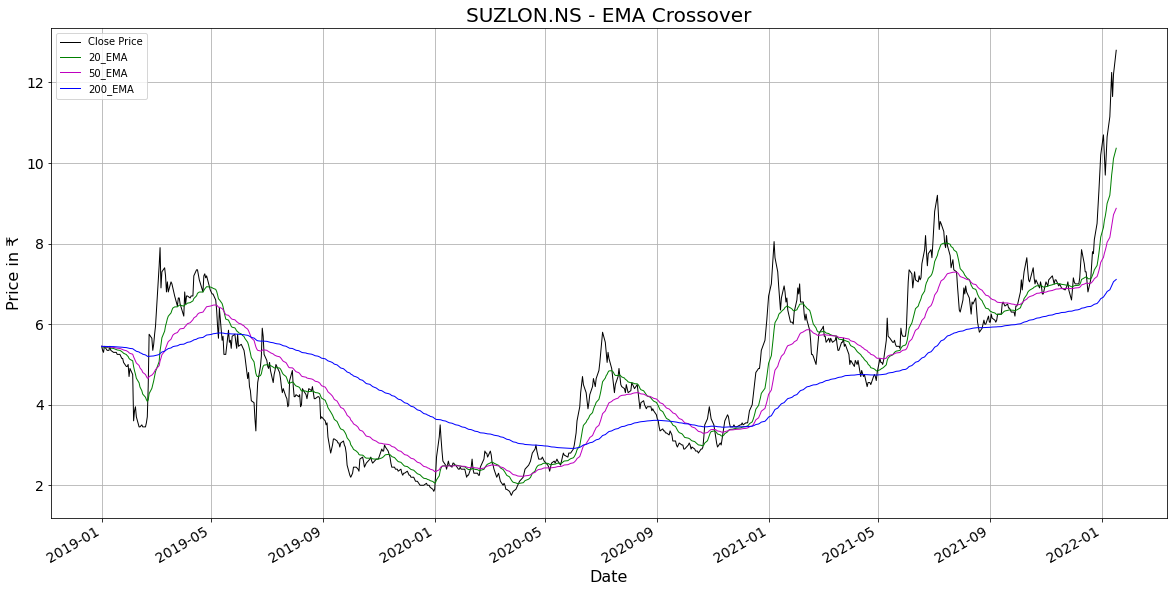

SUZLON.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |          5.35 |  5.44048 |  5.44608 |     5.449 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


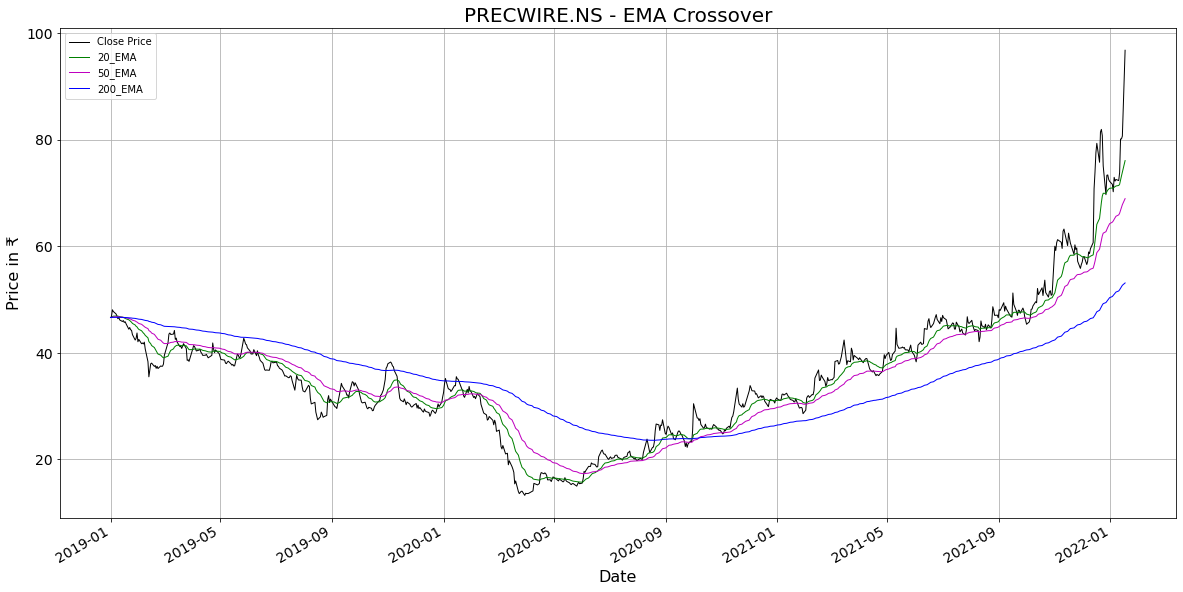

PRECWIRE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         46.81 |  46.6652 |  46.6563 |   46.6516 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


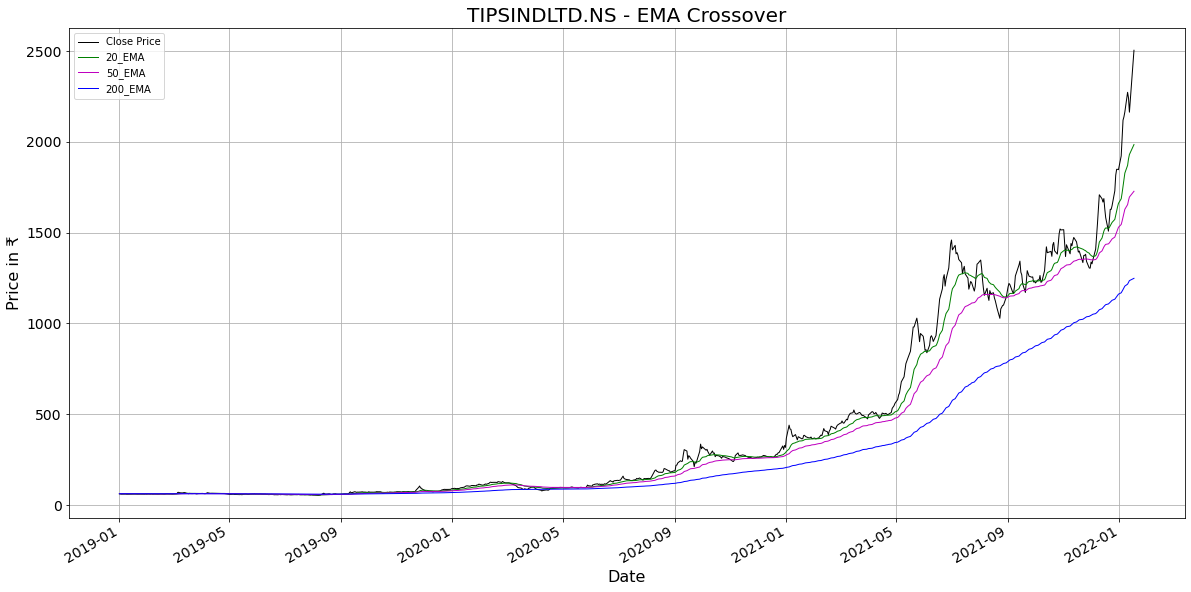

TIPSINDLTD.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2019-01-02 00:00:00 |         61.25 |  62.2905 |  62.3549 |   62.3886 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [9]:
table = True

for stock_id in stock_ids:
    start_date = '2019-01-01'
    plot_buy_sell(stock_id, start_date, table)

In [10]:
def get_buy_sell_signal(stock_symbol, start_date, end_date, moving_avg, short_window, mid_window,long_window):

    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start_date, end = end_date)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 

    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  

    if moving_avg == 'SMA':
        # Create a short simple moving average column
        stock_df[short_window_col] = stock_df['Close Price'].rolling(window = short_window, min_periods = 1).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long simple moving average column
        stock_df[long_window_col] = stock_df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long exponential moving average column
        stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    stock_df['Signal'] = 0.0  
    stock_df['Signal'] = np.where((stock_df['Close Price'] < stock_df[short_window_col]) 
                                  & (stock_df[short_window_col] < stock_df[mid_window_col])
                                  & (stock_df[mid_window_col] < stock_df[long_window_col]), 1.0, stock_df['Signal']) 
    
    stock_df['Signal'] = np.where((stock_df['Close Price'] > stock_df[short_window_col]) 
                                  & (stock_df[short_window_col] > stock_df[mid_window_col])
                                  & (stock_df[mid_window_col] > stock_df[long_window_col]), -1.0, stock_df['Signal']) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    stock_df['Position'] = stock_df['Signal'].diff()
    
    df_pos = stock_df[(stock_df['Position'] == 1) | (stock_df['Position'] == -1)]
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    df_pos = df_pos[df_pos['Signal'] != 0]
    df_pos['Prev_Signal'] = df_pos['Signal'].shift(1)
    df_pos = df_pos[df_pos['Signal'] != df_pos['Prev_Signal']]
    df_pos.drop('Prev_Signal', axis=1, inplace=True)
        
    df_pos['Stock'] = stock_symbol
    return df_pos.tail(1)

In [11]:
start_date = '2021-01-01'
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
moving_avg = 'EMA'
short_window = 20
mid_window = 50
long_window = 200

df_buy_sell = pd.DataFrame()

for stock_id in stock_ids:
    #stock_id = stock_id.upper() + '.NS'
    tmp = get_buy_sell_signal(stock_id, start_date, end_date, moving_avg, short_window, mid_window, long_window)
    df_buy_sell = df_buy_sell.append(tmp)
    
df_buy_sell.sort_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Close Price       20_EMA       50_EMA      200_EMA  Signal  \
Date                                                                     
2021-01-12   139.149994   133.358775   133.356249   133.304501    -1.0   
2021-01-19  1503.849976  1450.934991  1450.896156  1428.320255    -1.0   
2021-01-20    81.849998    76.342757    76.301191    73.791501    -1.0   
2021-01-21   290.600006   230.167091   229.189998   192.638548    -1.0   
2021-01-22  1122.650024  1000.219936   999.881252   923.550686    -1.0   
2021-02-01   603.799988   544.016089   543.730951   530.620519    -1.0   
2021-02-02    50.450001    46.983351    46.831818    44.847734    -1.0   
2021-02-03    81.599998    74.423555    74.219566    69.335953    -1.0   
2021-02-04   303.779999   292.028119   291.722501   289.584788    -1.0   
2021-02-04   158.690002   153.343959   153.239169   150.363835    -1.0   
2021-02-08  2019.040039  1930.269036  1930.201519  1639.513488    -1.0   
2021-02-08    90.000000    83.033951    82.651923    78.578827    -1.0   
2021-02-08  3214.100098  3177.085108  3176.615403  2985.914420    -1.0   
2021-02-09    86.300003    81.850996    81.838889    80.926570    -1.0   
2021-02-10  2967.699951  2876.355967  2871.935704  2809.264203    -1.0   
2021-02-11    35.279999    31.733243    31.419310    31.370689    -1.0   
2021-02-12   409.350006   383.608591   382.288333   372.323872    -1.0   
2021-02-17   696.799988   676.374855   676.069702   652.276592    -1.0   
2021-02-25   628.500000   612.397820   602.426922   602.012204    -1.0   
2021-03-08   675.750000   623.843356   621.460867   620.756899    -1.0   
2021-03-09  1345.550049  1304.113715  1303.360642  1276.265952    -1.0   
2021-03-10  1892.449951  1721.344568  1707.645831  1677.703479    -1.0   
2021-03-15    88.500000    73.254252    73.070000    69.547598    -1.0   
2021-03-23   980.849976   966.607528   965.426000   956.745543    -1.0   
2021-04-08    69.050003    70.600875    73.915000    73.939273     1.0   
2021-04-15    92.800003    83.793585    74.253000    74.182808    -1.0   
2021-04-30  2819.149902  2909.769638  3133.415010  3133.966913     1.0   
2021-05-26  4098.600098  4013.865466  3784.303013  3783.625090    -1.0   
2021-06-07  2933.100098  2842.590664  2668.714985  2668.231709    -1.0   
2021-06-07   172.199997   160.690455   146.901334   146.575398    -1.0   
2021-06-09  1730.750000  1603.629249  1532.424995  1531.458041    -1.0   
2021-06-10  6086.399902  5698.084563  5329.058975  5324.953419    -1.0   
2021-06-15  2250.000000  2140.410117  2019.886001  2017.475229    -1.0   
2021-07-02     8.800000     7.553440     6.324000     6.307241    -1.0   
2021-07-27  5180.799805  5148.517354  4878.971992  4842.535514    -1.0   
2021-08-03   580.200012   548.731630   536.786002   536.626969    -1.0   
2021-10-05   299.450012   273.693326   218.321000   217.580913    -1.0   
2021-10-21  1089.400024   686.502741   684.810717   518.400456    -1.0   
2021-12-01   740.950012   766.641556   787.788000   788.723957     1.0   
2021-12-14  2318.300049  2354.233389  2450.283003  2454.469101     1.0   
2021-12-20   633.599976   677.630739   692.754998   693.440813     1.0   
2021-12-24   667.500000   687.996400   725.408995   726.549462     1.0   
2021-12-30   885.400024   900.780091  1000.635004  1002.538283     1.0   

           Position          Stock  
Date                                
2021-01-12     Sell       CANBK.NS  
2021-01-19     Sell    HDFCBANK.NS  
2021-01-20     Sell         IEX.NS  
2021-01-21     Sell  TATAMOTORS.NS  
2021-01-22     Sell     HAVELLS.NS  
2021-02-01     Sell   ICICIBANK.NS  
2021-02-02     Sell  NATIONALUM.NS  
2021-02-03     Sell  FEDERALBNK.NS  
2021-02-04     Sell       IRCTC.NS  
2021-02-04     Sell   NIFTYBEES.NS  
2021-02-08     Sell  ALKYLAMINE.NS  
2021-02-08     Sell   TATAPOWER.NS  
2021-02-08     Sell         TCS.NS  
2021-02-09     Sell   IBREALEST.NS  
2021-02-10     Sell       DMART.NS  
2021-02-11     Sell    PRECWIRE.NS  
2021-02-12     

[*********************100%***********************]  1 of 1 completed


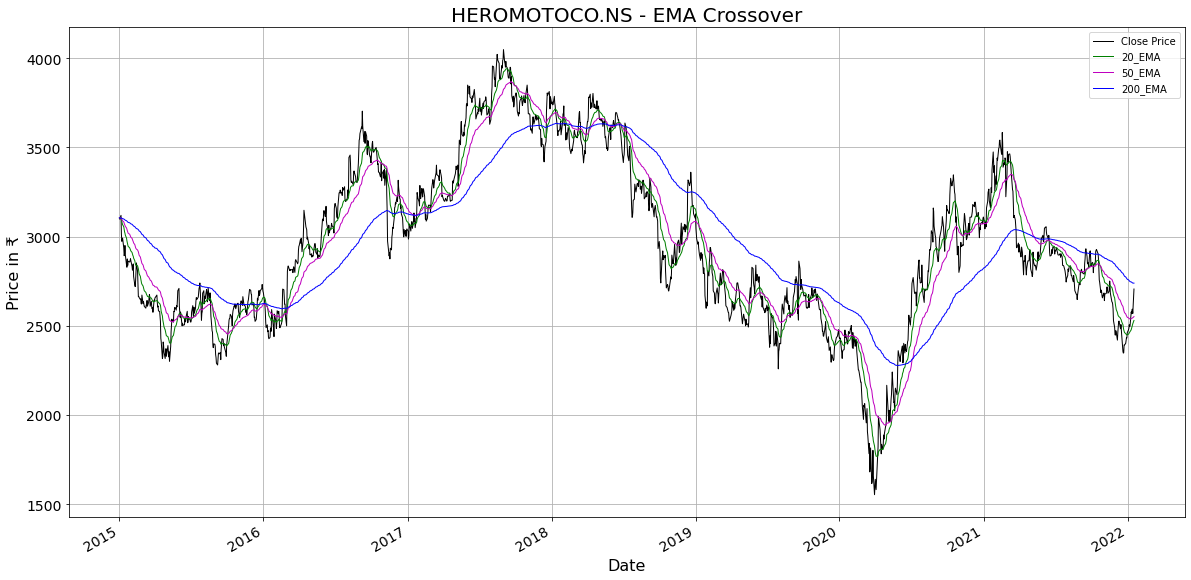

HEROMOTOCO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2015-01-02 00:00:00 |        3098.1 |   3104.7 |  3105.11 |   3105.33 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [12]:
plot_buy_sell('HEROMOTOCO.NS', '2015-01-01', True)